# Hands On Visualization Practice using the Google Health COVID-19 dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 **Starting with these three core CSV files**:

**Aggregated:**
- Main table. It combines epidemiological data (cases, deaths) with a location key and date.

**Demographics:**
- This dataset provides static population data for different regions. We'll need this to normalize our case and death counts (e.g., to calculate cases per 100,000 people).

**Index:**
- This file is essential for spatial mapping. It links the location_key from the other datasets to geographical information like FIPS codes, latitude, and longitude.

The `location key` system is **hierarchical**:
- `US` (Country level)
- `US_CA` (State/Province level)
- `US_CA_06085` (County/Municipality level, using FIPS codes)

## Aggregated Data for Pakistan

In [9]:
# URL of the aggregated COVID-19 data for Pakistan
url = "https://storage.googleapis.com/covid19-open-data/v3/location/PK.csv"

# For Continental level include these also
BanglasDesh = 'https://storage.googleapis.com/covid19-open-data/v3/location/BD.csv'
Japan = 'https://storage.googleapis.com/covid19-open-data/v3/location/JP.csv'
China = 'https://storage.googleapis.com/covid19-open-data/v3/location/CN.csv'
Indonesia = 'https://storage.googleapis.com/covid19-open-data/v3/location/ID.csv'
India = 'https://storage.googleapis.com/covid19-open-data/v3/location/IN.csv'



df = pd.read_csv(url, low_memory=False)
df_BD = pd.read_csv(BanglasDesh, low_memory=False)
df_JP = pd.read_csv(Japan, low_memory=False)
df_CN = pd.read_csv(China, low_memory=False)
df_ID = pd.read_csv(Indonesia, low_memory=False)
df_IN = pd.read_csv(India, low_memory=False)

print("DataFrame head:")
df.head()

DataFrame head:


location_key        date                     place_id wikidata_id  \
0           PK  2020-01-01  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   
1           PK  2020-01-02  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   
2           PK  2020-01-03  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   
3           PK  2020-01-04  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   
4           PK  2020-01-05  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   

  datacommons_id country_code country_name iso_3166_1_alpha_2  \
0    country/PAK           PK     Pakistan                 PK   
1    country/PAK           PK     Pakistan                 PK   
2    country/PAK           PK     Pakistan                 PK   
3    country/PAK           PK     Pakistan                 PK   
4    country/PAK           PK     Pakistan                 PK   

  iso_3166_1_alpha_3  aggregation_level  ...  investment_in_vaccines  \
0                PAK                  0  ...                     0.0   
1                PAK                  0  ...                     0.0   
2                PAK                  0  ...                     0.0   
3                PAK                  0  ...                     0.0   
4                PAK                  0  ...                     0.0   

   facial_coverings  vaccination_policy  stringency_index  \
0               0.0                 0.0               0.0   
1               0.0                 0.0               0.0   
2               0.0                 0.0               0.0   
3               0.0                 0.0               0.0   
4               0.0                 0.0               0.0   

   average_temperature_celsius  minimum_temperature_celsius  \
0                     6.500000                     3.000000   
1                     9.833333                     3.928571   
2                    11.129630                     5.250000   
3                    11.793651                     6.285714   
4                     9.007937                     6.857143   

   maximum_temperature_celsius  rainfall_mm  dew_point  relative_humidity  
0                    10.833333     0.000000   1.638889          74.473481  
1                    15.166667     0.000000   3.087302          64.829876  
2                    18.583333     0.000000   4.000000          61.816124  
3                    17.928571     0.000000   4.539683          61.726086  
4                    10.785714     1.560286   6.468254          84.140100  

[5 rows x 93 columns]

In [10]:
print("DataFrame shape:", df.shape)

DataFrame shape: (991, 93)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 93 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           991 non-null    object 
 1   date                                   991 non-null    object 
 2   place_id                               991 non-null    object 
 3   wikidata_id                            991 non-null    object 
 4   datacommons_id                         991 non-null    object 
 5   country_code                           991 non-null    object 
 6   country_name                           991 non-null    object 
 7   iso_3166_1_alpha_2                     991 non-null    object 
 8   iso_3166_1_alpha_3                     991 non-null    object 
 9   aggregation_level                      991 non-null    int64  
 10  new_confirmed                          988 non-null    float64
 11  new_de

# **Continental Analysis**

In [12]:
# URLs for the COVID-19 data for Pakistan, India, and China
urls = {
    'Pakistan': 'https://storage.googleapis.com/covid19-open-data/v3/location/PK.csv',
    'India': 'https://storage.googleapis.com/covid19-open-data/v3/location/IN.csv',
    'China': 'https://storage.googleapis.com/covid19-open-data/v3/location/CN.csv'
}

# List to hold the individual DataFrames
dfs = []

# Loop through the URLs, read each CSV into a DataFrame, and append to the list
for country, url in urls.items():
    print(f"Loading data for {country}...")
    df = pd.read_csv(url, low_memory=False)
    dfs.append(df)
    print(f"Loaded data for {country} with shape: {df.shape}")

print("\nCombining all datasets...")
combined_df = pd.concat(dfs, ignore_index=True)       # outer join by default, creates a new dataframe that includes all unique columns from all the original dataframes


print("\nCombined DataFrame shape:", combined_df.shape)

Loading data for Pakistan...
Loaded data for Pakistan with shape: (991, 93)
Loading data for India...
Loaded data for India with shape: (991, 175)
Loading data for China...
Loaded data for China with shape: (991, 89)

Combining all datasets...

Combined DataFrame shape: (2973, 178)


In [13]:
print("\nCombined DataFrame head:")
combined_df.head()


Combined DataFrame head:


location_key        date                     place_id wikidata_id  \
0           PK  2020-01-01  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   
1           PK  2020-01-02  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   
2           PK  2020-01-03  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   
3           PK  2020-01-04  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   
4           PK  2020-01-05  ChIJH3X9-NJS2zgRXJIU5veht0Y        Q843   

  datacommons_id country_code country_name iso_3166_1_alpha_2  \
0    country/PAK           PK     Pakistan                 PK   
1    country/PAK           PK     Pakistan                 PK   
2    country/PAK           PK     Pakistan                 PK   
3    country/PAK           PK     Pakistan                 PK   
4    country/PAK           PK     Pakistan                 PK   

  iso_3166_1_alpha_3  aggregation_level  ...  new_deceased_female  \
0                PAK                  0  ...                  NaN   
1                PAK                  0  ...                  NaN   
2                PAK                  0  ...                  NaN   
3                PAK                  0  ...                  NaN   
4                PAK                  0  ...                  NaN   

   cumulative_deceased_male  cumulative_deceased_female  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

   new_hospitalized_patients_male  new_hospitalized_patients_female  \
0                             NaN                               NaN   
1                             NaN                               NaN   
2                             NaN                               NaN   
3                             NaN                               NaN   
4                             NaN                               NaN   

   cumulative_hospitalized_patients_male  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   cumulative_hospitalized_patients_female  new_recovered  \
0                                      NaN            NaN   
1                                      NaN            NaN   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

   cumulative_recovered  snowfall_mm  
0                   NaN          NaN  
1                   NaN          NaN  
2                   NaN          NaN  
3                   NaN          NaN  
4                   NaN          NaN  

[5 rows x 178 columns]

In [14]:
df = combined_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Columns: 178 entries, location_key to snowfall_mm
dtypes: float64(136), int64(23), object(19)
memory usage: 4.0+ MB


## **Missing Values**

In [15]:
pd.DataFrame(df.isnull().sum())

0
location_key                                0
date                                        0
place_id                                    0
wikidata_id                                 0
datacommons_id                              0
...                                       ...
cumulative_hospitalized_patients_male    2361
cumulative_hospitalized_patients_female  2361
new_recovered                            2127
cumulative_recovered                     2126
snowfall_mm                              2495

[178 rows x 1 columns]

In [16]:
# Droping columns with 70% missing values
threshold = 0.70
rows_count = len(df)
print(f"Total number of rows in the DataFrame: {rows_count}")


missing_percentage = df.isnull().sum() / rows_count


columns_to_drop = missing_percentage[missing_percentage > threshold].index
print(f"\nDropping {len(columns_to_drop)} columns with more than {threshold*100}% missing values.")
print("Columns to be dropped:", columns_to_drop.tolist())


df_cleaned = df.drop(columns=columns_to_drop)


print(f"\nNew DataFrame shape: {df_cleaned.shape}")
print("\nRemaining missing values after dropping columns:")
pd.DataFrame(df_cleaned.isnull().sum())

Total number of rows in the DataFrame: 2973

Dropping 86 columns with more than 70.0% missing values.
Columns to be dropped: ['cumulative_persons_fully_vaccinated', 'new_confirmed_age_0', 'new_confirmed_age_1', 'new_confirmed_age_2', 'new_confirmed_age_3', 'new_confirmed_age_4', 'new_confirmed_age_5', 'new_confirmed_age_6', 'new_confirmed_age_7', 'new_confirmed_age_8', 'new_confirmed_age_9', 'cumulative_confirmed_age_0', 'cumulative_confirmed_age_1', 'cumulative_confirmed_age_2', 'cumulative_confirmed_age_3', 'cumulative_confirmed_age_4', 'cumulative_confirmed_age_5', 'cumulative_confirmed_age_6', 'cumulative_confirmed_age_7', 'cumulative_confirmed_age_8', 'cumulative_confirmed_age_9', 'new_deceased_age_0', 'new_deceased_age_1', 'new_deceased_age_2', 'new_deceased_age_3', 'new_deceased_age_4', 'new_deceased_age_5', 'new_deceased_age_6', 'new_deceased_age_7', 'new_deceased_age_8', 'new_deceased_age_9', 'cumulative_deceased_age_0', 'cumulative_deceased_age_1', 'cumulative_deceased_age_2'

0
location_key                  0
date                          0
place_id                      0
wikidata_id                   0
datacommons_id                0
...                          ..
minimum_temperature_celsius  21
maximum_temperature_celsius  21
rainfall_mm                  21
dew_point                    21
relative_humidity            21

[92 rows x 1 columns]

### **Imputation of Missing values**
- For **critical columns** like `new_confirmed` and `new_deceased`, fill these missing values. Since they are time-series data, a good approach is to fill them with zeroes, as a missing report often means there were no new cases or deaths on that day.
- **Time-Series Features:** like `mobility and policy metrics` (e.g., stringency_index), fill the missing data using a `forward-fill method`. This assumes that the policy or mobility level from the previous day is a good proxy for the current day.
- **other columns** with a high number of missing values (like `new_tested`, `new_persons_vaccinated`, etc.) that are not directly our target or main features, safer approach is to `fill them with zeroes`.

In [17]:
df = df_cleaned.copy()

In [18]:
# Fill missing values in core target variables with 0
df['new_confirmed'] = df['new_confirmed'].fillna(0)
df['new_deceased'] = df['new_deceased'].fillna(0)

# time-series-like columns to be forward-filled
ffill_columns = [
    'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
    'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces',
    'mobility_residential', 'school_closing', 'workplace_closing',
    'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing',
    'stay_at_home_requirements', 'restrictions_on_internal_movement',
    'international_travel_controls', 'income_support', 'debt_relief',
    'public_information_campaigns', 'testing_policy', 'contact_tracing',
    'facial_coverings', 'vaccination_policy', 'stringency_index'
]

# Apply ffill to these columns
for col in ffill_columns:
    df[col] = df.groupby('location_key')[col].ffill()     # why groupby because each country had diff policy

# Fill the remaining missing values with 0
df = df.fillna(0)

print("DataFrame missing values after imputation:")
print(df.isnull().sum().to_string())

DataFrame missing values after imputation:
location_key                             0
date                                     0
place_id                                 0
wikidata_id                              0
datacommons_id                           0
country_code                             0
country_name                             0
iso_3166_1_alpha_2                       0
iso_3166_1_alpha_3                       0
aggregation_level                        0
new_confirmed                            0
new_deceased                             0
new_tested                               0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_tested                        0
new_persons_vaccinated                   0
cumulative_persons_vaccinated            0
new_persons_fully_vaccinated             0
new_vaccine_doses_administered           0
cumulative_vaccine_doses_administered    0
population                               0
population_

## **Feature Engineering**

### **Per Capita Metrics and Rolling Averages**  

To make our analysis comparable across countries with different populations, we need to **normalize** our key metrics.  

1. **Create per capita versions** of new cases and deaths (dividing by population).  
2. **Calculate a 7-day rolling average** to smooth out daily fluctuations and highlight long-term trends.  
   - This provides a more stable and reliable target variable for our model.  

**Why?**  
- **Per capita metrics** allow fair comparison between countries of different sizes.  
- **Rolling averages** reduce noise (e.g., reporting delays, weekly patterns) and reveal true trends.  

### **Lag Features**  
Time-series models benefit from **lag features**, which incorporate past values to predict future trends.
- Create a new column representing **cases from seven days prior** (a common COVID-19 incubation period).  
- This helps the model recognize cyclical patterns in disease spread.  

**Why?**  
- **Temporal dependency:** Today's cases are often influenced by cases from the previous week.  
- **Improves forecasting:** Lag features help the model learn from historical patterns.  


In [28]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['location_key', 'date'])


df['new_confirmed_per_capita'] = df['new_confirmed'] / df['population']

# a 7-day rolling average of per capita confirmed cases
df['rolling_avg_7_days'] = df.groupby('location_key')['new_confirmed_per_capita'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

df['new_confirmed_per_capita_lag_7'] = df.groupby('location_key')['new_confirmed_per_capita'].shift(7)

pd.DataFrame(df[['date', 'country_name', 'new_confirmed', 'population', 'new_confirmed_per_capita', 'rolling_avg_7_days', 'new_confirmed_per_capita_lag_7']].head(10))

date country_name  new_confirmed  population  \
1982 2020-01-01        China            0.0  1439323774   
1983 2020-01-02        China            1.0  1439323774   
1984 2020-01-03        China            0.0  1439323774   
1985 2020-01-04        China            3.0  1439323774   
1986 2020-01-05        China            0.0  1439323774   
1987 2020-01-06        China            0.0  1439323774   
1988 2020-01-07        China            0.0  1439323774   
1989 2020-01-08        China            0.0  1439323774   
1990 2020-01-09        China            0.0  1439323774   
1991 2020-01-10        China           41.0  1439323774   

      new_confirmed_per_capita  rolling_avg_7_days  \
1982              0.000000e+00        0.000000e+00   
1983              6.947707e-10        3.473854e-10   
1984              0.000000e+00        2.315902e-10   
1985              2.084312e-09        6.947707e-10   
1986              0.000000e+00        5.558166e-10   
1987              0.000000e+00        4.631805e-10   
1988              0.000000e+00        3.970118e-10   
1989              0.000000e+00        3.970118e-10   
1990              0.000000e+00        2.977589e-10   
1991              2.848560e-08        4.367130e-09   

      new_confirmed_per_capita_lag_7  
1982                             NaN  
1983                             NaN  
1984                             NaN  
1985                             NaN  
1986                             NaN  
1987                             NaN  
1988                             NaN  
1989                    0.000000e+00  
1990                    6.947707e-10  
1991                    0.000000e+00

In [34]:
df_eng_copy = df.copy()

# **Visualization**

## 1. Time Series Trends (Over Time)

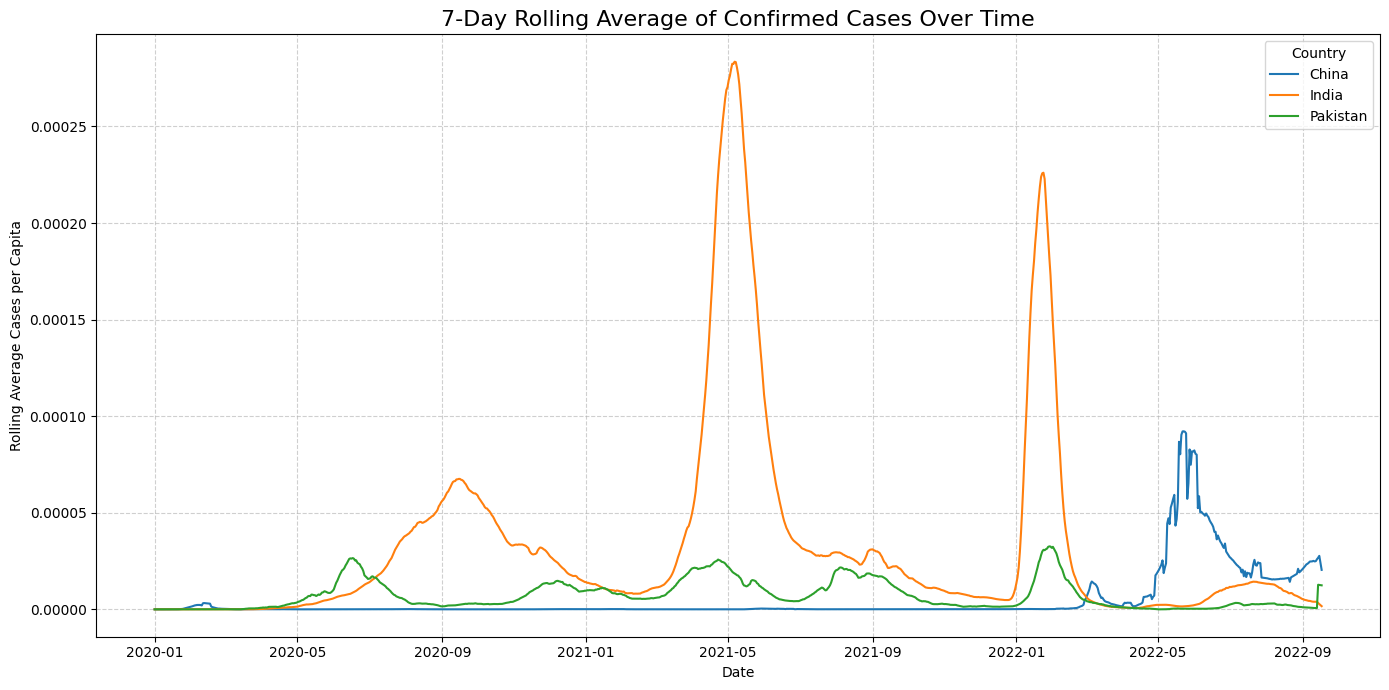

In [140]:
df = df.sort_values(by=['date', 'country_name'])


plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='rolling_avg_7_days', hue='country_name')

plt.title('7-Day Rolling Average of Confirmed Cases Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Rolling Average Cases per Capita')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country')
plt.tight_layout()
# plt.savefig('./images/7-Day Rolling Average of Confirmed Cases Over Time.png', dpi=300, bbox_inches='tight', facecolor='#f5f5f2')
plt.show()

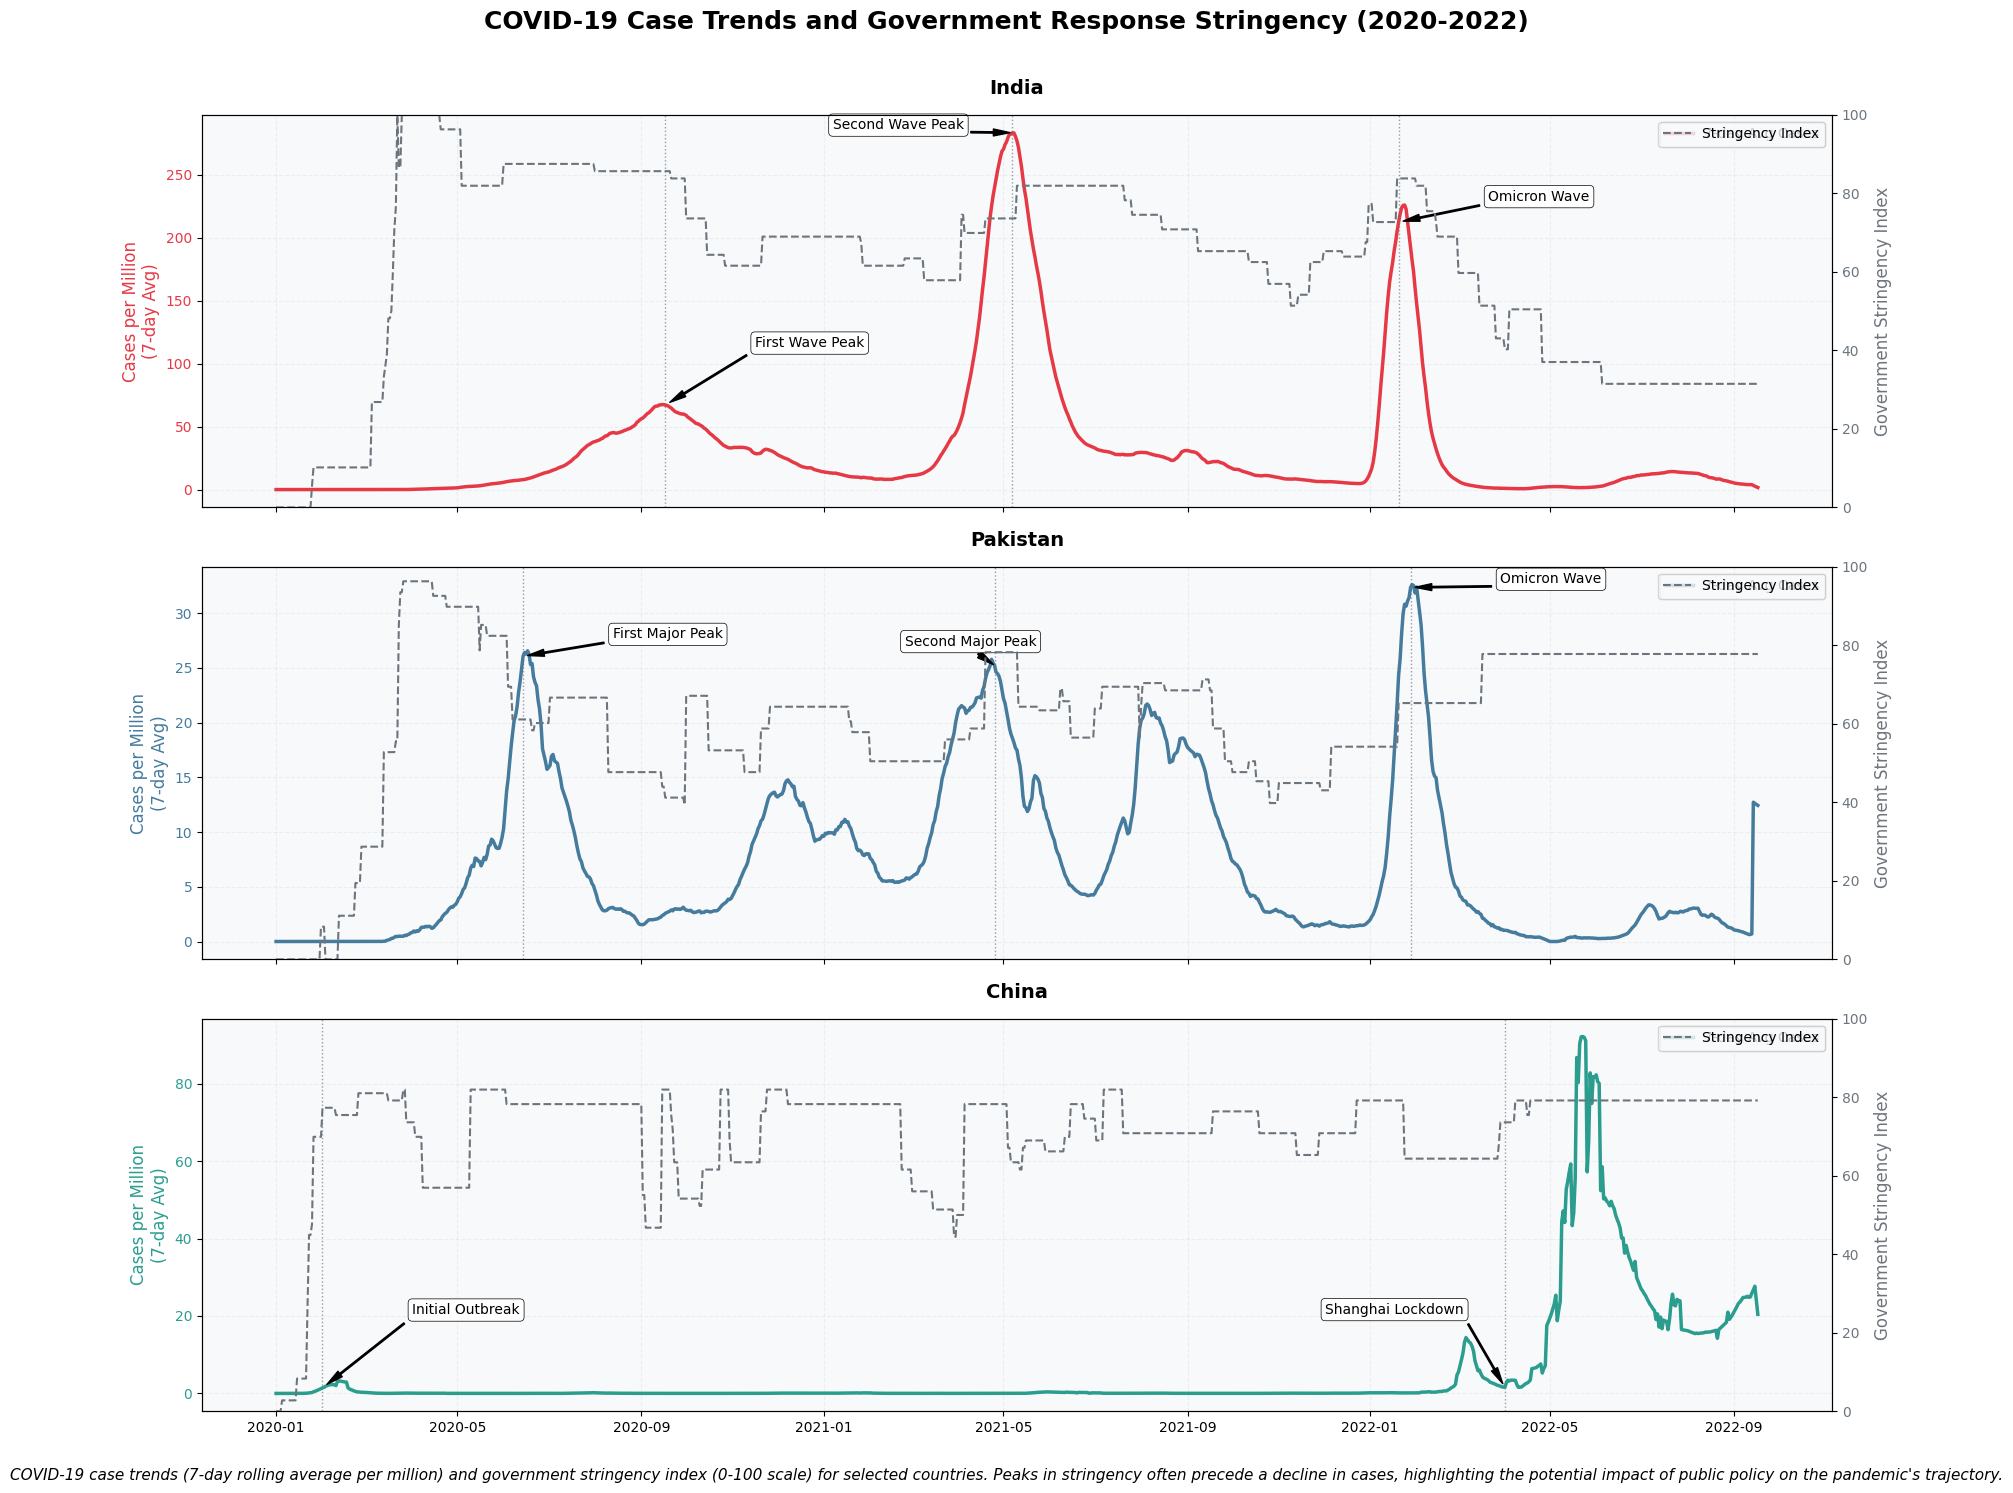

In [142]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['location_key', 'date'])

# Convert cases from per capita to per million to match the plot label
df['rolling_avg_7_days_per_million'] = df['rolling_avg_7_days'] * 1_000_000

# Custom Styling
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.facecolor': '#f8f9fa',
    'figure.facecolor': 'white',
    'axes.edgecolor': 'black',
    'grid.color': 'lightgrey',
    'grid.alpha': 0.3,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Subplots
fig, axes = plt.subplots(3, 1, figsize=(18, 15), sharex=True)
fig.suptitle('COVID-19 Case Trends and Government Response Stringency (2020-2022)',
             fontsize=18, weight='bold', y=0.99)

countries = ['India', 'Pakistan', 'China']
colors = ['#e63946', '#457b9d', '#2a9d8f']
line_styles = {'cases': '-', 'stringency': '--'}

# For Annotation
annotation_params = {
    'fontsize': 10,
    'arrowprops': dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
    'bbox': dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
}

# plot
for i, country in enumerate(countries):
    ax = axes[i]
    df_country = df[df['country_name'] == country].copy()

    # Primary axis (Cases per Million)
    cases_line = sns.lineplot(data=df_country, x='date', y='rolling_avg_7_days_per_million',
                 ax=ax, color=colors[i], linewidth=2.5,
                 label='7-day Avg Cases')
    ax.set_title(f'{country}', pad=15, fontsize=14)
    ax.set_ylabel('Cases per Million\n(7-day Avg)', color=colors[i])
    ax.tick_params(axis='y', labelcolor=colors[i])
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_xlabel('')

    # Secondary axis (Stringency)
    ax2 = ax.twinx()
    stringency_line = sns.lineplot(data=df_country, x='date', y='stringency_index',
                 ax=ax2, color='#6c757d', linestyle=line_styles['stringency'],
                 linewidth=1.5, label='Stringency Index')
    ax2.set_ylabel('Government Stringency Index', color='#6c757d')
    ax2.tick_params(axis='y', labelcolor='#6c757d')
    ax2.set_ylim(0, 100)

    # Combine legends from both axes
    lines = cases_line.get_lines() + stringency_line.get_lines()
    labels = [l.get_label() for l in lines]
    # ax.legend(lines, labels, loc='upper left')

    # Country-Specific Annotations
    if country == 'India':
        peaks = [
            ('2020-09-17', 'First Wave Peak', pd.Timedelta(days=60)),
            ('2021-05-07', 'Second Wave Peak', pd.Timedelta(days=-120)),
            ('2022-01-20', 'Omicron Wave', pd.Timedelta(days=60))
        ]
    elif country == 'Pakistan':
        peaks = [
            ('2020-06-14', 'First Major Peak', pd.Timedelta(days=60)),
            ('2021-04-25', 'Second Major Peak', pd.Timedelta(days=-60)),
            ('2022-01-28', 'Omicron Wave', pd.Timedelta(days=60))
        ]
    elif country == 'China':
        peaks = [
            ('2020-02-01', 'Initial Outbreak', pd.Timedelta(days=60)),
            ('2022-04-01', 'Shanghai Lockdown', pd.Timedelta(days=-120))
        ]

    # annotations for the country
    for peak_date_str, label, offset in peaks:
        peak_date = pd.to_datetime(peak_date_str)
        y_val = df_country[df_country['date'] == peak_date]['rolling_avg_7_days_per_million'].values
        if y_val.size > 0:
            ax.axvline(x=peak_date, color='#6c757d', linestyle=':', linewidth=1, alpha=0.7)
            ax.annotate(label,
                       xy=(peak_date, y_val[0]),
                       xytext=(peak_date + offset, y_val[0] + (ax.get_ylim()[1] - y_val[0])*0.2),
                       **annotation_params)

plt.xlabel('Date', labelpad=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

plt.figtext(0.5, 0.01,
           "COVID-19 case trends (7-day rolling average per million) and government stringency index (0-100 scale) for selected countries. Peaks in stringency often precede a decline in cases, highlighting the potential impact of public policy on the pandemic's trajectory.",
           ha="center", fontsize=11, style='italic')
# plt.savefig('./images/COVID-19 Case Trends and Government Response Stringency (2020-2022).png', dpi=300, bbox_inches='tight')
plt.show()

### **Stacked Area Chart** — Mobility Proportions
- A value of 0% indicates that mobility is at the same level as the baseline.
- A value of -50% means that mobility has decreased by 50% compared to the baseline.
- A value of +25% means that mobility has increased by 25% compared to the baseline.

In [ ]:
df_country.head()

location_key       date                     place_id wikidata_id  \
1982           CN 2020-01-01  ChIJwULG5WSOUDERbzafNHyqHZU        Q148   
1983           CN 2020-01-02  ChIJwULG5WSOUDERbzafNHyqHZU        Q148   
1984           CN 2020-01-03  ChIJwULG5WSOUDERbzafNHyqHZU        Q148   
1985           CN 2020-01-04  ChIJwULG5WSOUDERbzafNHyqHZU        Q148   
1986           CN 2020-01-05  ChIJwULG5WSOUDERbzafNHyqHZU        Q148   

     datacommons_id country_code country_name iso_3166_1_alpha_2  \
1982    country/CHN           CN        China                 CN   
1983    country/CHN           CN        China                 CN   
1984    country/CHN           CN        China                 CN   
1985    country/CHN           CN        China                 CN   
1986    country/CHN           CN        China                 CN   

     iso_3166_1_alpha_3  aggregation_level  ...  average_temperature_celsius  \
1982                CHN                  0  ...                    -4.316667   
1983                CHN                  0  ...                    -4.233333   
1984                CHN                  0  ...                    -4.148148   
1985                CHN                  0  ...                    -3.351852   
1986                CHN                  0  ...                    -4.622222   

      minimum_temperature_celsius  maximum_temperature_celsius  rainfall_mm  \
1982                   -13.300000                     5.088889     0.000000   
1983                   -12.738889                     4.577778     0.000000   
1984                   -13.191358                     5.320988     0.056444   
1985                    -9.962963                     4.796296     0.874889   
1986                    -9.711111                     3.683333     0.762000   

      dew_point  relative_humidity  new_confirmed_per_capita  \
1982 -14.933333          47.536541              0.000000e+00   
1983 -14.277778          49.348051              6.947707e-10   
1984 -14.395062          46.062754              0.000000e+00   
1985 -10.833333          58.939527              2.084312e-09   
1986 -11.183333          61.051798              0.000000e+00   

      rolling_avg_7_days  new_confirmed_per_capita_lag_7  \
1982        0.000000e+00                             NaN   
1983        3.473854e-10                             NaN   
1984        2.315902e-10                             NaN   
1985        6.947707e-10                             NaN   
1986        5.558166e-10                             NaN   

      rolling_avg_7_days_per_million  
1982                        0.000000  
1983                        0.000347  
1984                        0.000232  
1985                        0.000695  
1986                        0.000556  

[5 rows x 96 columns]

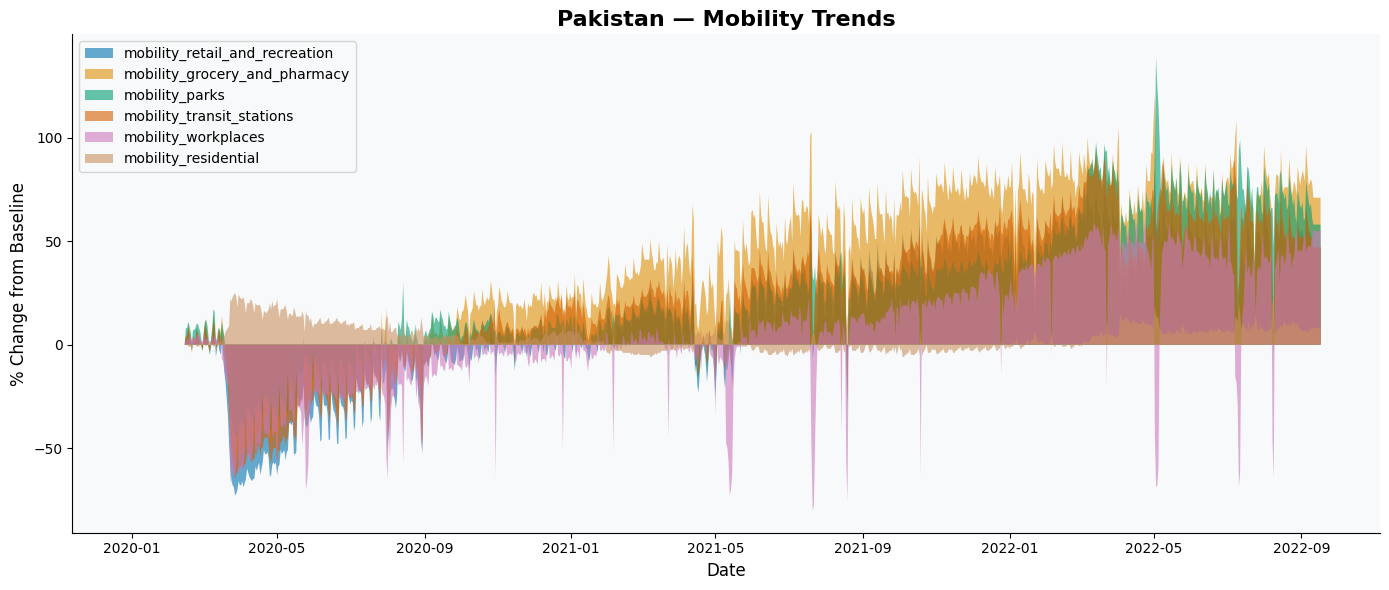

In [148]:
country_filter = 'Pakistan'
df_country = df[df['country_name'] == country_filter].copy()
df_country = df_country.sort_values('date')

mobility_cols = [
    'mobility_retail_and_recreation',
    'mobility_grocery_and_pharmacy',
    'mobility_parks',
    'mobility_transit_stations',
    'mobility_workplaces',
    'mobility_residential'
]

# Melt for stacked area chart
df_mobility = df_country[['date'] + mobility_cols].melt(id_vars='date',
                                                        var_name='Category',
                                                        value_name='Mobility Change')

# stacked area
plt.figure(figsize=(14, 6))
sns.set_palette("colorblind")
for category in mobility_cols:
    subset = df_country[['date', category]]
    plt.fill_between(df_country['date'], subset[category], alpha=0.6, label=category)

plt.title(f"{country_filter} — Mobility Trends", fontsize=16, weight='bold')
plt.xlabel("Date")
plt.ylabel("% Change from Baseline")
plt.legend(loc="upper left", frameon=True)
sns.despine()
plt.tight_layout()

# plt.savefig('./images/Pakistan — Mobility Trends.png', dpi=300, bbox_inches='tight')
plt.show()


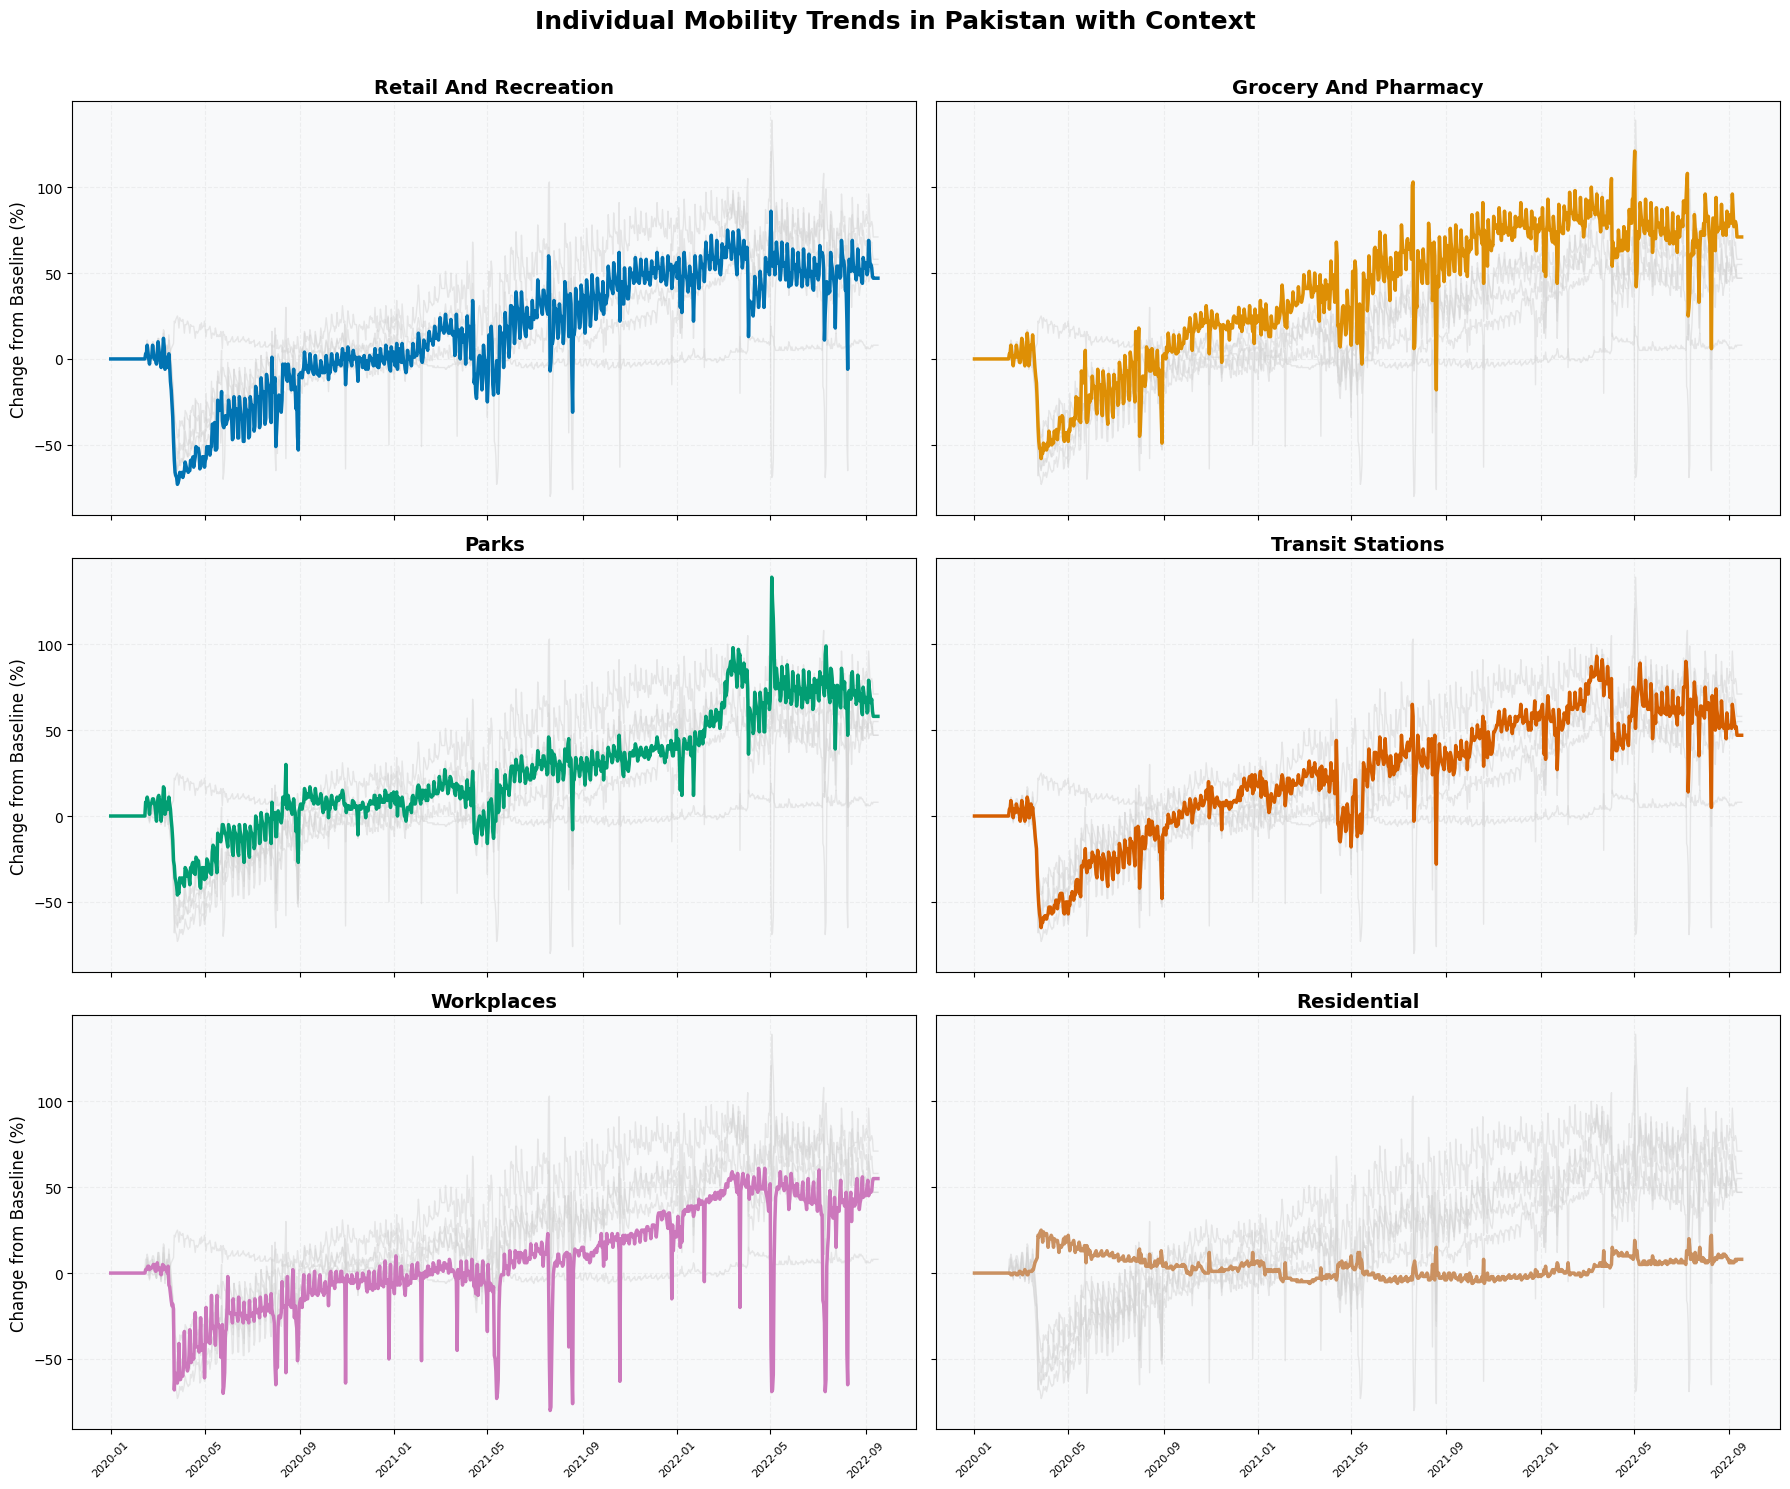

In [152]:
df_india = df[df['country_name'] == 'Pakistan'].copy()
df_india['date'] = pd.to_datetime(df_india['date'])
df_india = df_india.sort_values(by='date')

# Data for Subplots
mobility_cols = [
    'mobility_retail_and_recreation',
    'mobility_grocery_and_pharmacy',
    'mobility_parks',
    'mobility_transit_stations',
    'mobility_workplaces',
    'mobility_residential'
]

# Renamed columns for cleaner labels
df_india_mobility = df_india[['date'] + mobility_cols].copy()
new_col_names = [col.replace('mobility_', '').replace('_', ' ').title() for col in mobility_cols]
df_india_mobility.columns = ['date'] + new_col_names

# plot
fig, axes = plt.subplots(3, 2, figsize=(18, 15), sharex=True, sharey=True)
axes = axes.flatten()
fig.suptitle('Individual Mobility Trends in Pakistan with Context', fontsize=18, weight='bold', y=0.99)

# color palette for the highlighted lines
highlight_colors = sns.color_palette("colorblind", n_colors=len(new_col_names))

for i, col in enumerate(new_col_names):
    ax = axes[i]

    # all lines in a muted grey
    for other_col in new_col_names:
        if other_col != col:
            sns.lineplot(data=df_india_mobility, x='date', y=other_col, ax=ax, color='lightgrey', alpha=0.5, linewidth=1)

    # highlighted line with a bold color
    sns.lineplot(data=df_india_mobility, x='date', y=col, ax=ax, color=highlight_colors[i], linewidth=2.5)

    ax.set_title(col, fontsize=14, weight='bold')
    ax.set_ylabel('Change from Baseline (%)')
    ax.set_xlabel('')
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.98])

# plt.savefig('./images/Individual Mobility Trends in Pakistan with Context.png', dpi=300, bbox_inches='tight')
plt.show()

### Mobility Trends Analysis (Above Plots)

#### **Retail and Recreation & Transit Stations**
These two plots show the most dramatic decline during the first lockdown in late March 2020. This indicates a significant drop in non-essential travel and leisure activities. The trends for both categories show:
- Gradual recovery after initial lockdown
- Another sharp dip during the second wave peak in mid-2021  
- Slower recovery after second wave

Suggests these activities were highly sensitive to both government restrictions and public health concerns.

#### **Workplaces**
This plot follows a similar pattern to retail and transit, but with key differences:
- Less steep decline during initial lockdown  
  - Reason: Essential workers still commuted  
  - Many shifted to remote work  
- Shows slow but steady return to workplaces after first wave

#### **Residential**
The inverse trend of others shows:
- Massive spike in late March 2020  
- Another spike during mid-2021 second wave  
Directly corresponds to people staying home, acting as a clear indicator of:  
1. Lockdown effectiveness  
2. Public caution levels  

#### **Grocery and Pharmacy & Parks**
**Grocery/Pharmacy**:
- Slight initial dip  
- Quick recovery (essential services)  

**Parks**:  
- Initial drop  
- Subsequent recovery and increase  
People sought outdoor alternatives when other options were unavailable

### **Line Chart with Event Markers**

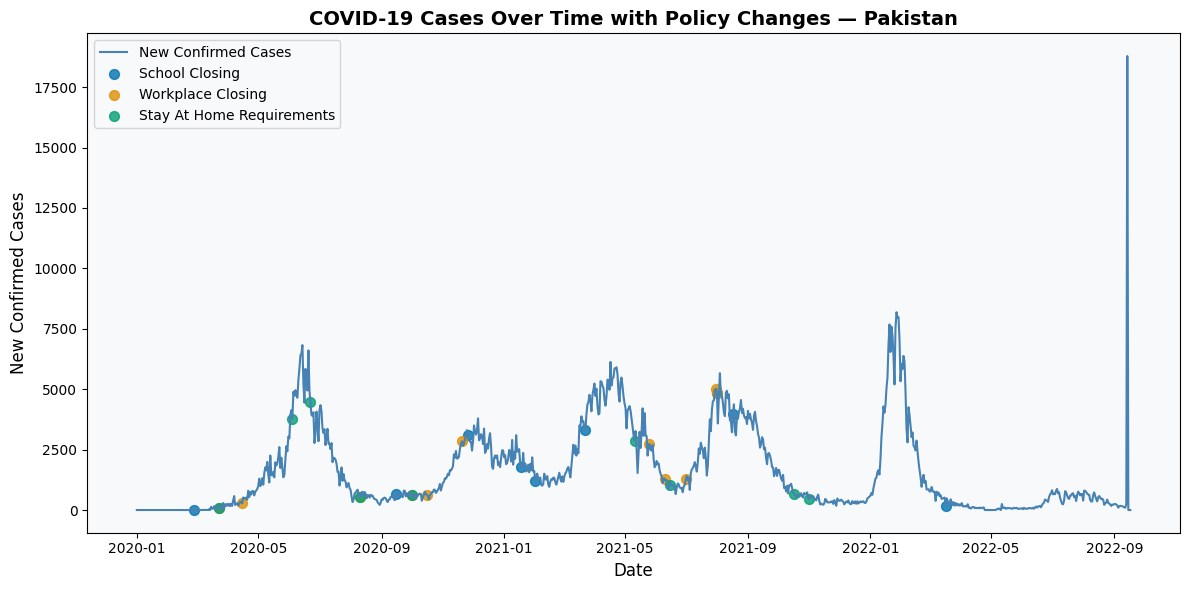

In [156]:
country_filter = "Pakistan"


country_df = df[df['country_name'] == country_filter].copy()

plt.figure(figsize=(12, 6))

# Plot cases over time
sns.lineplot(
    data=country_df,
    x='date',
    y='new_confirmed',
    color='steelblue',
    label='New Confirmed Cases'
)

# policy changes
policy_dates = ['school_closing', 'workplace_closing', 'stay_at_home_requirements']
colors = sns.color_palette("colorblind", len(policy_dates))

for i, policy in enumerate(policy_dates):
    # Mark days where policy level changes
    changes = country_df[country_df[policy].diff().fillna(0) != 0]
    plt.scatter(
        changes['date'],
        changes['new_confirmed'],
        color=colors[i],
        label=policy.replace("_", " ").title(),
        s=50,
        alpha=0.8
    )

plt.title(f"COVID-19 Cases Over Time with Policy Changes — {country_filter}")
plt.xlabel("Date")
plt.ylabel("New Confirmed Cases")
plt.legend()
plt.tight_layout()

# plt.savefig(f'./images/COVID-19 Cases Over Time with Policy Changes — {country_filter}.png', dpi=300, bbox_inches='tight')
plt.show()


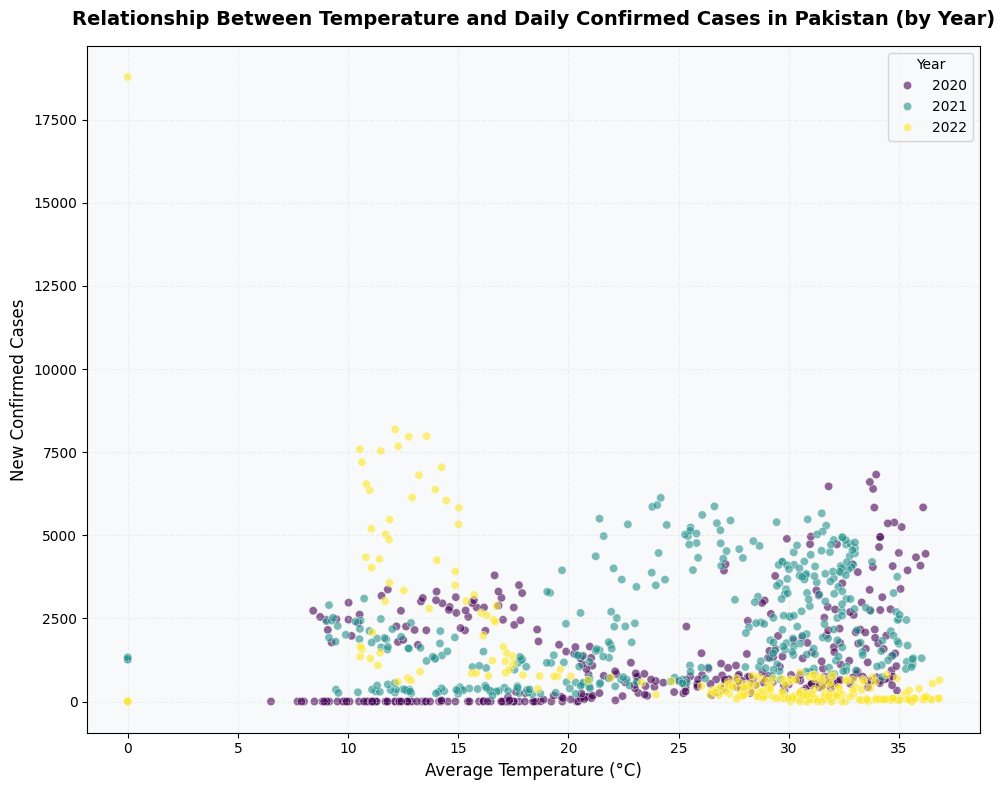

In [160]:
df_india = df[df['country_name'] == 'Pakistan'].copy()
df_india['date'] = pd.to_datetime(df_india['date'])
df_india['year'] = df_india['date'].dt.year

# Drop rows where either temperature or cases are missing
df_plot = df_india.dropna(subset=['average_temperature_celsius', 'new_confirmed']).copy()


fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(data=df_plot,
                x='average_temperature_celsius',
                y='new_confirmed',
                hue='year',
                palette='viridis',
                alpha=0.6,
                ax=ax)

ax.set_title('Relationship Between Temperature and Daily Confirmed Cases in Pakistan (by Year)', pad=15)
ax.set_xlabel('Average Temperature (°C)')
ax.set_ylabel('New Confirmed Cases')
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(title='Year')

plt.tight_layout()

# plt.savefig('./images/Relationship Between Temperature and Daily Confirmed Cases in Pakistan (by Year).png', dpi=300, bbox_inches='tight')

plt.show()

#### `date` + (`cumulative_confirmed`, `cumulative_deceased`, `cumulative_tested`)

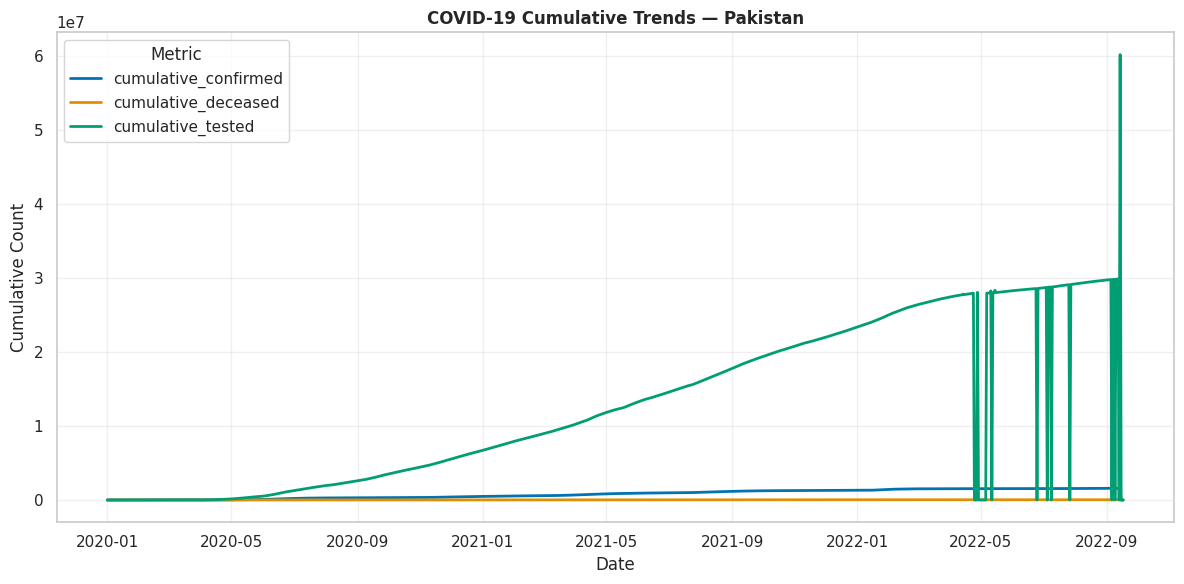

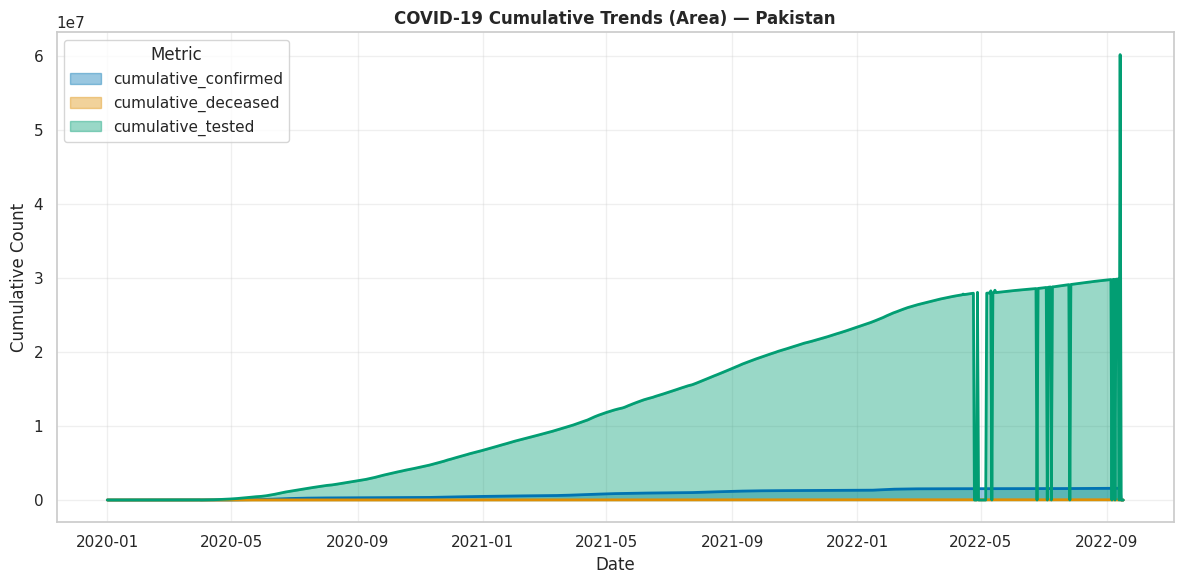

In [ ]:
country_filter = "Pakistan"

country_df = df[df['country_name'] == country_filter].copy()

# Melt data for plotting
cumulative_cols = ["cumulative_confirmed", "cumulative_deceased", "cumulative_tested"]
melted_df = country_df.melt(id_vars="date", value_vars=cumulative_cols,
                            var_name="Metric", value_name="Count")

sns.set_theme(style="whitegrid", palette="colorblind")

# Multi-Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=melted_df,
    x="date",
    y="Count",
    hue="Metric",
    linewidth=2
)
plt.title(f"COVID-19 Cumulative Trends — {country_filter}")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
plt.legend(title="Metric", loc="upper left")
plt.tight_layout()
plt.show()

#Area plot
plt.figure(figsize=(12, 6))
for metric, color in zip(cumulative_cols, sns.color_palette("colorblind", n_colors=3)):
    plt.fill_between(country_df["date"], country_df[metric], label=metric, alpha=0.4, color=color)
    plt.plot(country_df["date"], country_df[metric], color=color, linewidth=2)

plt.title(f"COVID-19 Cumulative Trends (Area) — {country_filter}")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
plt.legend(title="Metric", loc="upper left")
plt.tight_layout()
plt.show()


#### `date` + (`new_persons_vaccinated`, `cumulative_persons_vaccinated`, `new_persons_fully_vaccinated`)

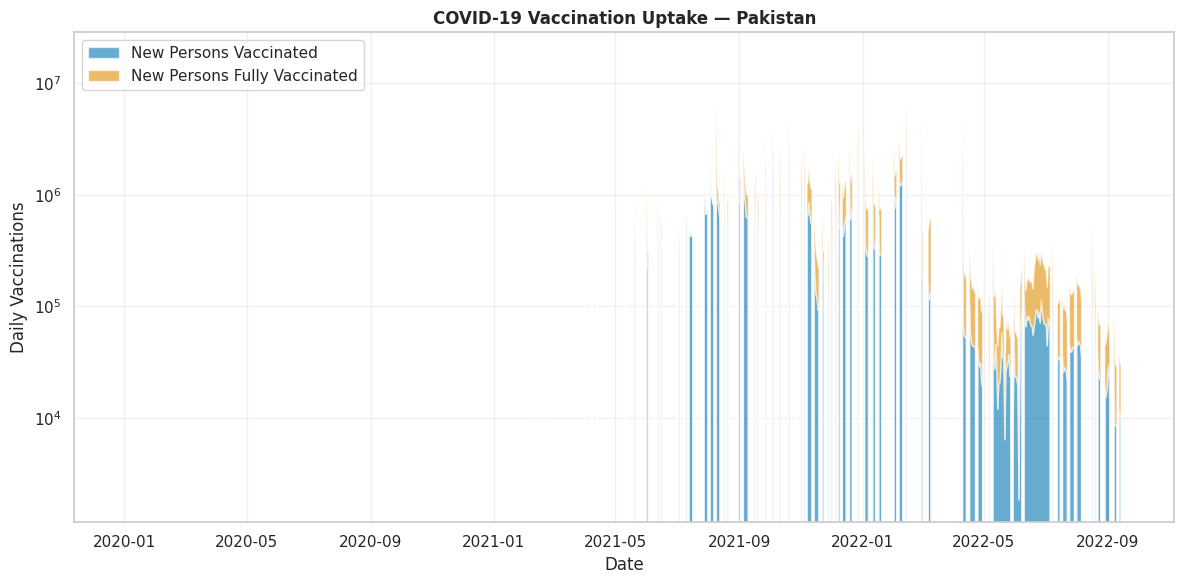

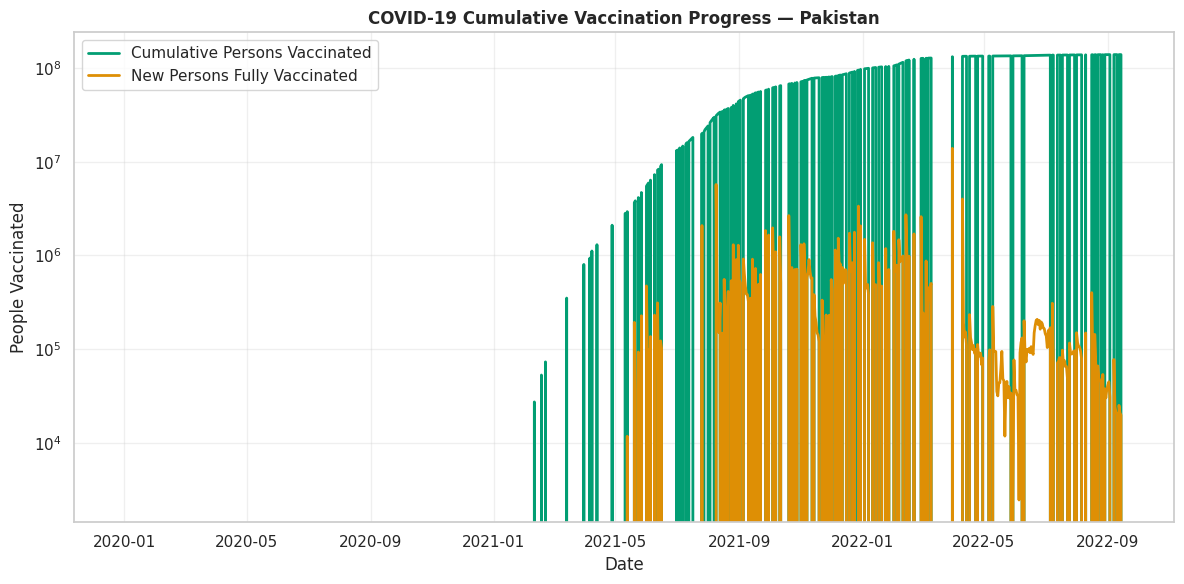

In [ ]:
country_filter = "Pakistan"


country_df = df[df['country_name'] == country_filter].copy()

sns.set_theme(style="whitegrid", palette="colorblind")

# Stacked Area Chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    country_df['date'],
    country_df['new_persons_vaccinated'],
    country_df['new_persons_fully_vaccinated'],
    labels=['New Persons Vaccinated', 'New Persons Fully Vaccinated'],
    colors=sns.color_palette("colorblind", n_colors=2),
    alpha=0.6
)
plt.title(f"COVID-19 Vaccination Uptake — {country_filter}")
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.yscale('log')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Line Chart (Cumulative)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=country_df,
    x='date',
    y='cumulative_persons_vaccinated',
    label='Cumulative Persons Vaccinated',
    color=sns.color_palette("colorblind")[2],
    linewidth=2
)
sns.lineplot(
    data=country_df,
    x='date',
    y='new_persons_fully_vaccinated',
    label='New Persons Fully Vaccinated',
    color=sns.color_palette("colorblind")[1],
    linewidth=2
)
plt.title(f"COVID-19 Cumulative Vaccination Progress — {country_filter}")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.yscale('log')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#### **Line Chart Overlay — Weather Variables with Cases**

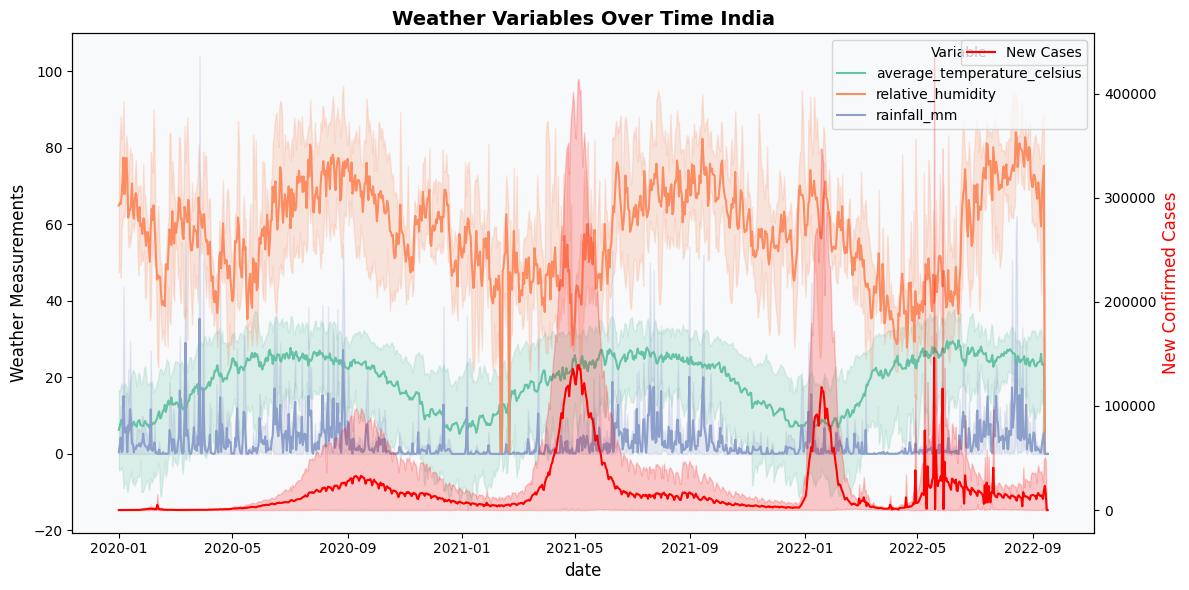

In [164]:
# Melt weather variables for multi-line plotting

weather_cols = ["average_temperature_celsius", "relative_humidity", "rainfall_mm"]
df_weather = df[["date"] + weather_cols + ["new_confirmed"]].copy()

df_melted = df_weather.melt(id_vars="date", value_vars=weather_cols, var_name="Variable", value_name="Value")

plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x="date", y="Value", hue="Variable", palette="Set2")
plt.ylabel("Weather Measurements")
plt.title(f"Weather Variables Over Time {country_filter}")

# Secondary axis for cases
ax2 = plt.gca().twinx()
sns.lineplot(data=df, x="date", y="new_confirmed", color="red", ax=ax2, label="New Cases")
ax2.set_ylabel("New Confirmed Cases", color="red")

plt.tight_layout()
# plt.savefig(f'./images/Weather Variables Over Time ({country_filter}).png', dpi=300, bbox_inches='tight')
plt.show()


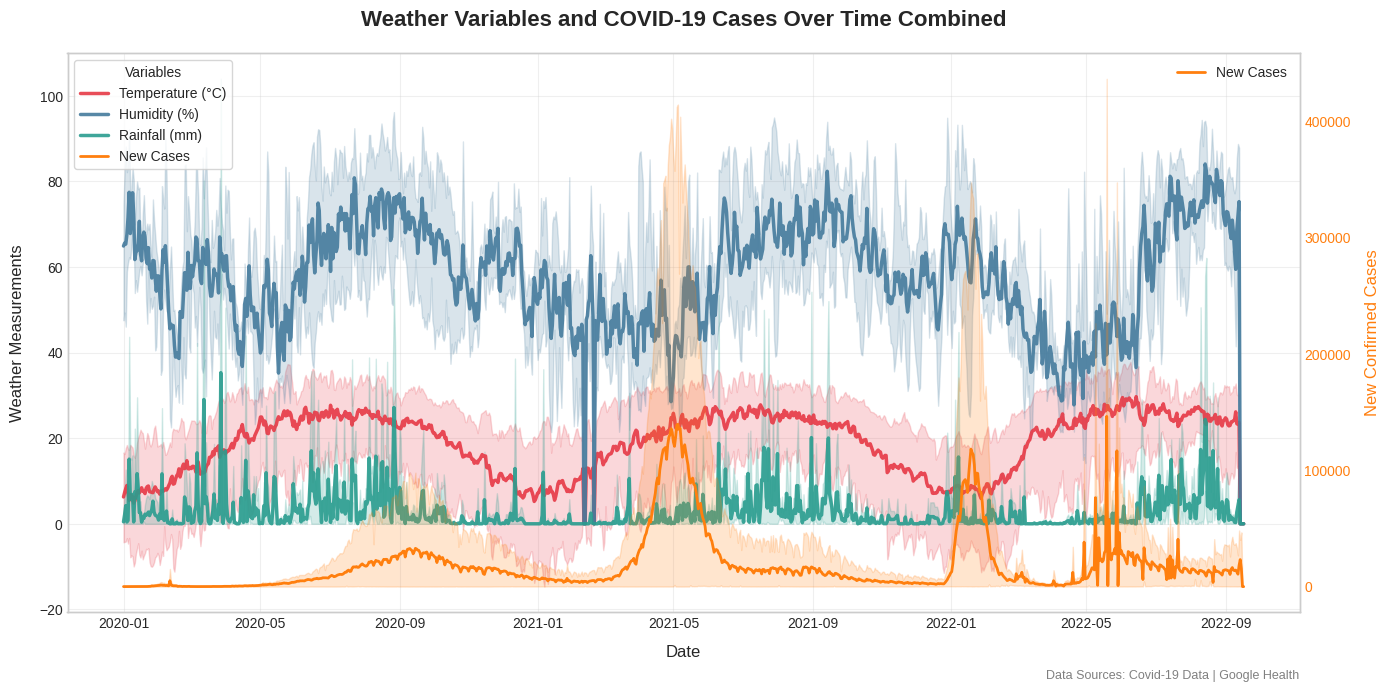

In [168]:

weather_cols = ["average_temperature_celsius", "relative_humidity", "rainfall_mm"]
df_weather = df[["date"] + weather_cols + ["new_confirmed"]].copy()
df_melted = df_weather.melt(id_vars="date",
                           value_vars=weather_cols,
                           var_name="Variable",
                           value_name="Value")

plt.figure(figsize=(14, 7))
plt.style.use('seaborn-v0_8-whitegrid')

# color palette
weather_palette = {
    "average_temperature_celsius": "#e63946",
    "relative_humidity": "#457b9d",
    "rainfall_mm": "#2a9d8f"
}

#plot weather variables
ax1 = sns.lineplot(
    data=df_melted,
    x="date",
    y="Value",
    hue="Variable",
    palette=weather_palette,
    linewidth=2.5,
    alpha=0.9
)

# primary axis
ax1.set_title(f"Weather Variables and COVID-19 Cases Over Time Combined",
             fontsize=16, pad=20, weight='bold')
ax1.set_xlabel("Date", labelpad=10)
ax1.set_ylabel("Weather Measurements", labelpad=10)
ax1.grid(alpha=0.3)

# legend
handles1, labels1 = ax1.get_legend_handles_labels()
clean_labels = ["Temperature (°C)", "Humidity (%)", "Rainfall (mm)"]
ax1.legend(handles1, clean_labels,
          title="Weather Variables",
          frameon=True,
          framealpha=1,
          edgecolor='white')

# cases on secondary axis
ax2 = ax1.twinx()
sns.lineplot(
    data=df,
    x="date",
    y="new_confirmed",
    color="#ff7f0e",
    linewidth=2,
    ax=ax2,
    label="New Cases"
)

# secondary axis
ax2.set_ylabel("New Confirmed Cases",
              color="#ff7f0e",
              labelpad=10)
ax2.tick_params(axis='y', colors="#ff7f0e")
ax2.grid(False)


# combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, clean_labels + ["New Cases"],
          loc='upper left',
          frameon=True,
          title="Variables")

# data source
plt.annotate("Data Sources: Covid-19 Data | Google Health",
            xy=(1, -0.12),
            xycoords='axes fraction',
            ha='right',
            fontsize=9,
            color='gray')

plt.tight_layout()
# plt.savefig(f'./images/Weather Variables and COVID-19 Cases Over Time (Combined).png', dpi=300, bbox_inches='tight')

plt.show()

#### **Scatter Chart — Weather vs. Cases**


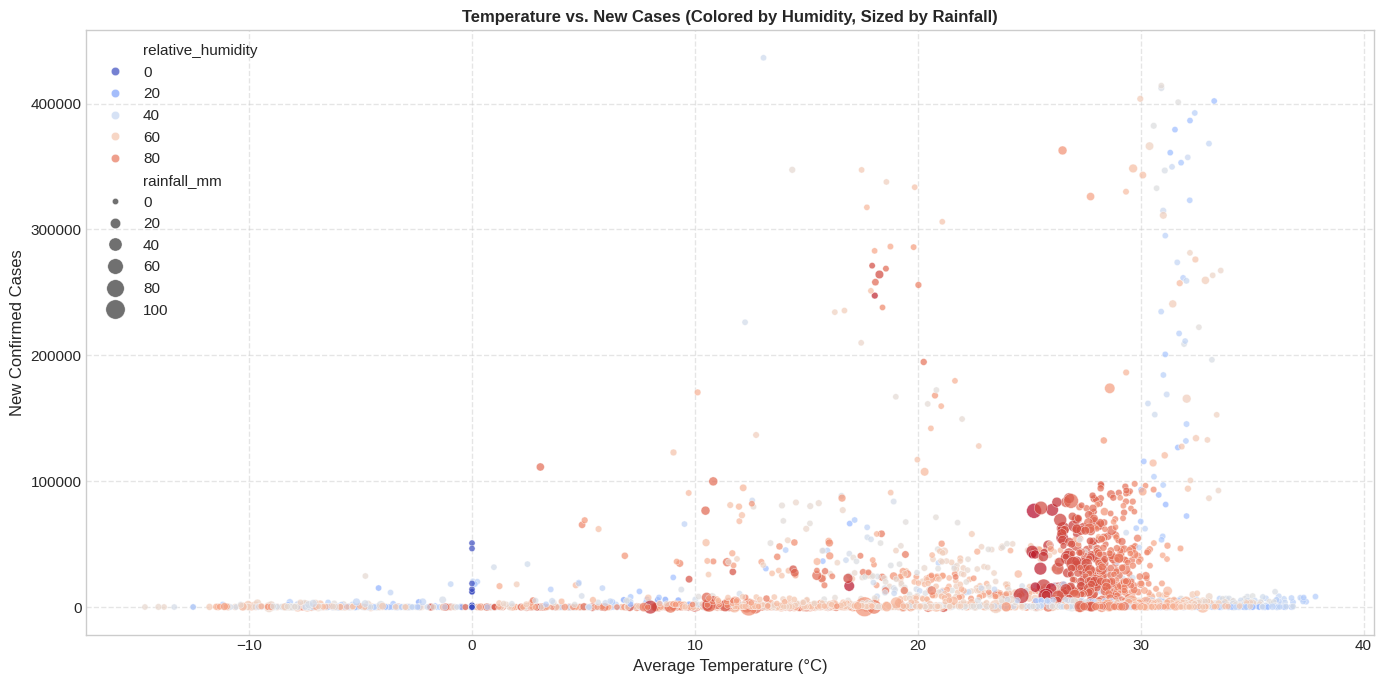

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(
    data=df,
    x="average_temperature_celsius",
    y="new_confirmed",
    hue="relative_humidity",
    size="rainfall_mm",
    palette="coolwarm",
    alpha=0.7,
    sizes=(20, 200)
)
plt.title("Temperature vs. New Cases (Colored by Humidity, Sized by Rainfall)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("New Confirmed Cases")
plt.grid(linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


#### **Lag vs. Current Cases Over Time**

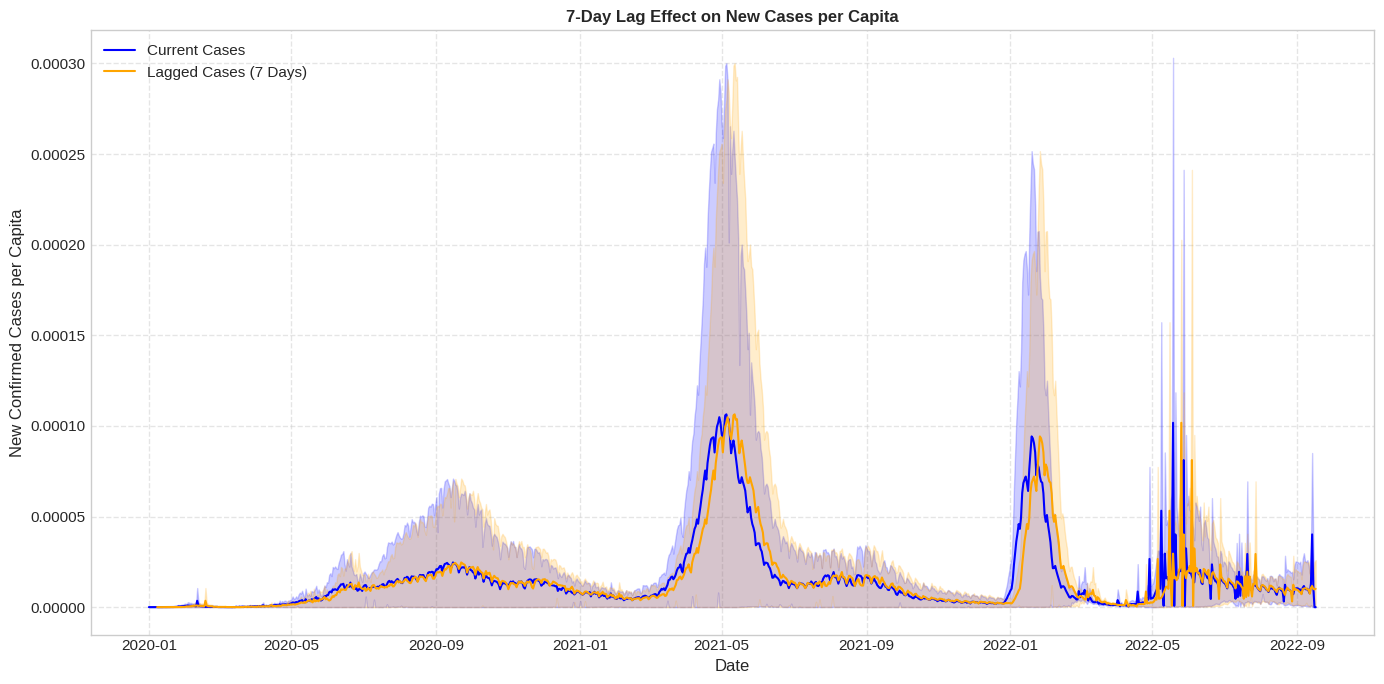

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x="date", y="new_confirmed_per_capita", label="Current Cases", color="blue")
sns.lineplot(data=df, x="date", y="new_confirmed_per_capita_lag_7", label="Lagged Cases (7 Days)", color="orange")

plt.title("7-Day Lag Effect on New Cases per Capita")
plt.xlabel("Date")
plt.ylabel("New Confirmed Cases per Capita")
# plt.yscale('log')
plt.legend()
plt.grid(linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


#### **All policy indicators + cases**

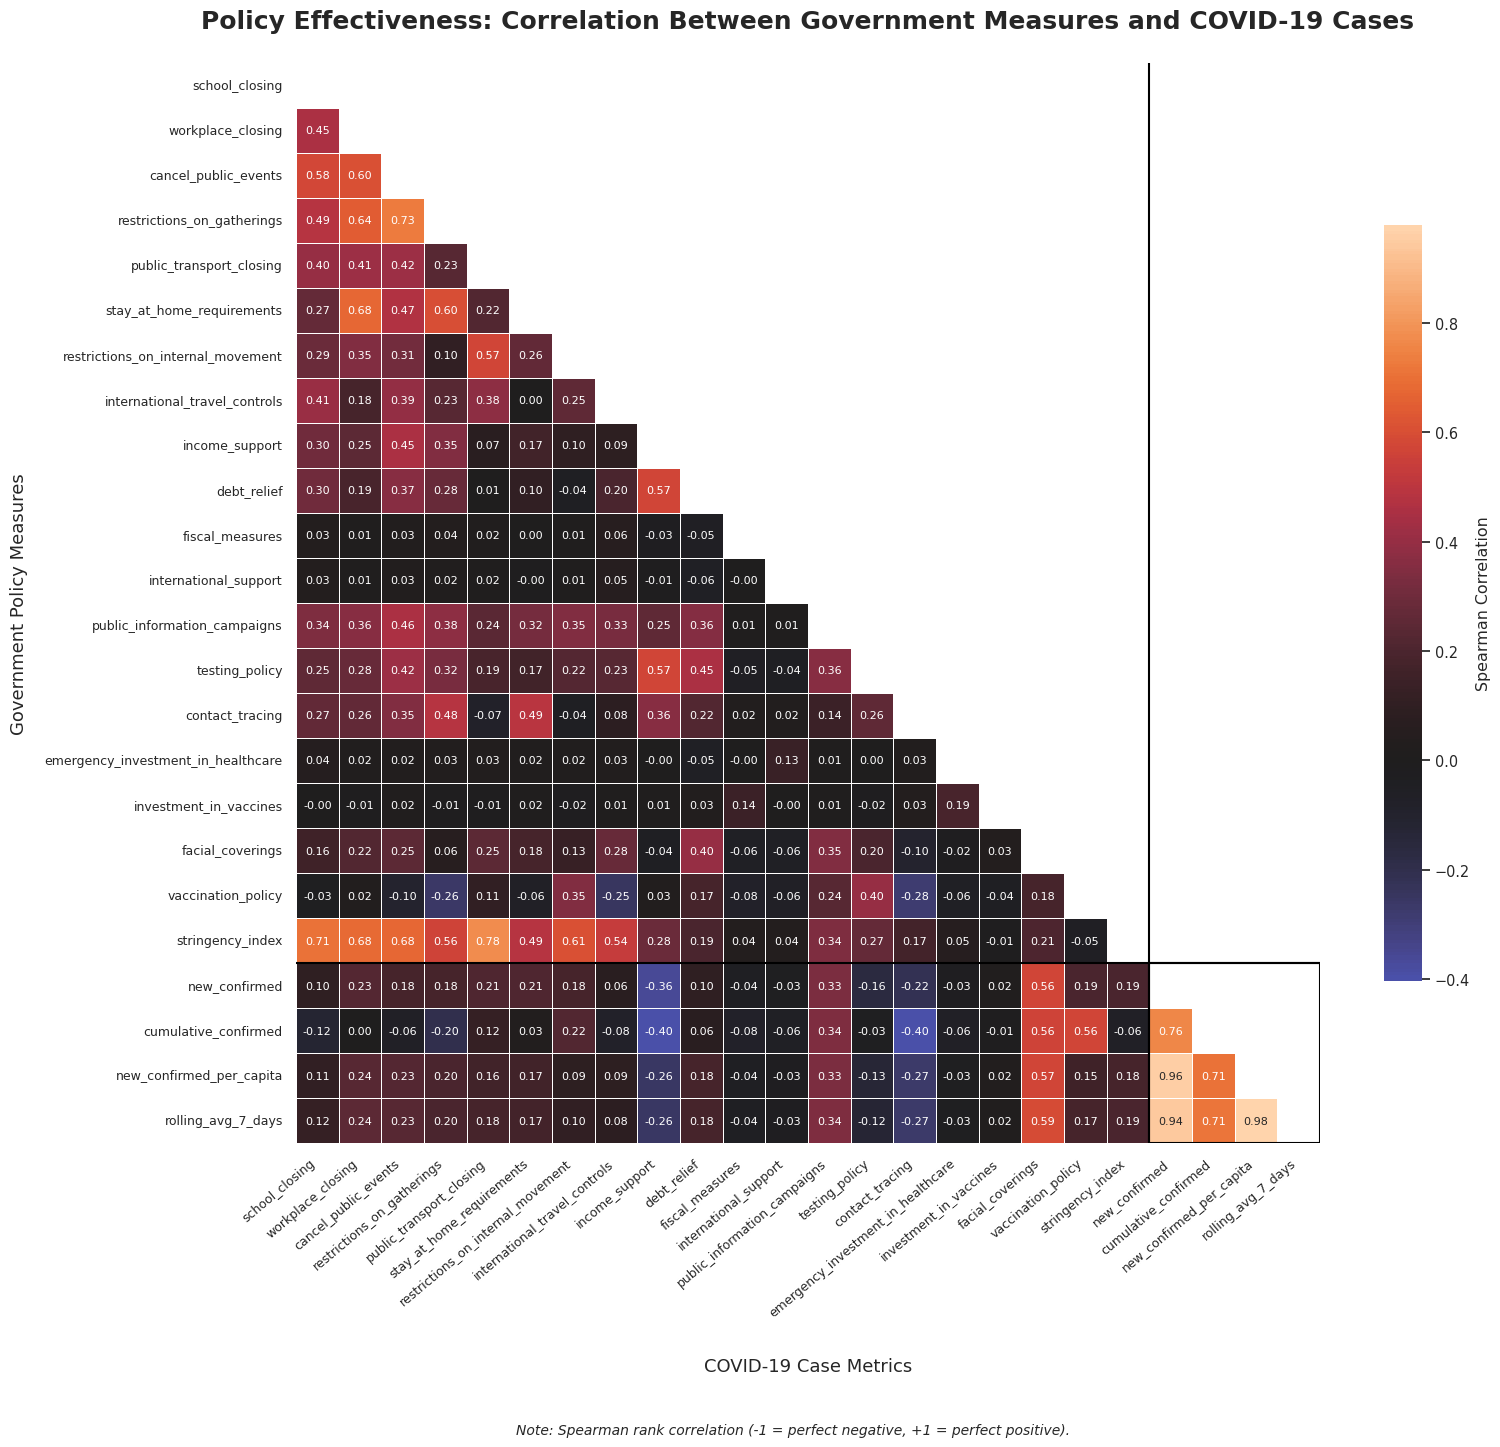

In [ ]:

policy_cols = [
    "school_closing", "workplace_closing", "cancel_public_events",
    "restrictions_on_gatherings", "public_transport_closing", "stay_at_home_requirements",
    "restrictions_on_internal_movement", "international_travel_controls", "income_support",
    "debt_relief", "fiscal_measures", "international_support", "public_information_campaigns",
    "testing_policy", "contact_tracing", "emergency_investment_in_healthcare",
    "investment_in_vaccines", "facial_coverings", "vaccination_policy", "stringency_index"
]

case_cols = [
    "new_confirmed", "cumulative_confirmed",
    "new_confirmed_per_capita", "rolling_avg_7_days"
]

# Spearman correlation
cols_for_corr = policy_cols + case_cols
df_corr = df[cols_for_corr].corr(method='spearman')

# for upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))


plt.figure(figsize=(16, 14))
sns.set(font_scale=0.95, style="white")

# Heatmap
ax = sns.heatmap(
    df_corr,
    mask=mask,
    cmap="icefire",
    # cmap = 'vlag',
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    linewidths=0.5,
    cbar_kws={"shrink": 0.7, "label": "Spearman Correlation"}
)


plt.title(
    "Policy Effectiveness: Correlation Between Government Measures and COVID-19 Cases",
    fontsize=18,
    pad=25,
    weight='bold'
)


plt.xlabel("\nCOVID-19 Case Metrics", fontsize=13, labelpad=12)
plt.ylabel("Government Policy Measures", fontsize=13, labelpad=12)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)

# Divider between policies and cases
divider_pos = len(policy_cols)
ax.axhline(y=divider_pos, color='black', linewidth=1.5)
ax.axvline(x=divider_pos, color='black', linewidth=1.5)

# Light shading for case metric area
ax.add_patch(plt.Rectangle(
    (divider_pos, divider_pos),  # (x, y) start
    len(case_cols),              # width
    len(case_cols),              # height
    fill=False, edgecolor='black', lw=1.5
))

# Footnote
plt.figtext(
    0.5, -0.03,
    "Note: Spearman rank correlation (-1 = perfect negative, +1 = perfect positive).",
    ha="center",
    fontsize=10,
    style='italic'
)

plt.tight_layout()
plt.show()


# **Model Part**
- Below this, You can skip if you want to as it was just a practice. Nothing More.
- **Temporal data is not my turf**, I fitted models that might not work as well as other temporal models (e.g., `ARIMA, Prophet, LSTM`) that inherently may be a best fit for this type of data.

In [30]:
from sklearn.model_selection import TimeSeriesSplit       # time-based splitting (not random) to mimic real forecasting
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet                 # needs scaling
from sklearn.ensemble import HistGradientBoostingRegressor      # no scaling needed
from sklearn.neighbors import NearestNeighbors      # To Add spatial lag (recent neighbor activity) on lon/lat

## Data

In [31]:
dfm = df_eng_copy.copy()

dfm = dfm.sort_values(['place_id', 'date'])     # sort by time

# target- 7-day ahead per-capita new cases

dfm['target_t7'] = dfm.groupby('place_id')['new_confirmed_per_capita'].shift(-7)

In [37]:
# Drop NA
dfm = dfm.dropna(subset=['target_t7'])

### Create simple time lags (past-only)

In [41]:
for lag in [1, 3, 7]:
    dfm[f'new_percap_lag_{lag}'] = dfm.groupby('place_id')['new_confirmed_per_capita'].shift(lag)
    dfm[f'rollavg_lag_{lag}']    = dfm.groupby('place_id')['rolling_avg_7_days'].shift(lag)

### Spatial lag via k-NN on lat/lon
- mean of neighbors’ recent `rolling_avg_7_days` (k-NN on coordinates)
- KNN on coordinates for each day independently is expensive, instead, use static neighbors

In [39]:
signal_col = 'rollavg_lag_1'        #most recent past signal


coords = dfm[['latitude','longitude']].to_numpy()
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(coords)
distances, indices = nbrs.kneighbors(coords)

In [42]:
# Compute neighbors' mean signal (excluding self at index 0 if we set n_neighbors>1 and the algorithm returns self first)
def neighbor_mean_signal(values, idx_matrix):

    # values: 1D array aligned with dfm rows
    out = np.empty(len(values), dtype=float)
    for i, neigh_idx in enumerate(idx_matrix):

        # to exclude i if present
        neigh = [j for j in neigh_idx if j != i]
        vv = values[neigh]
        out[i] = np.nanmean(vv) if vv.size else np.nan
    return out

In [43]:
vals = dfm[signal_col].to_numpy()
dfm['spatial_lag_rollavg_t-1_knn'] = neighbor_mean_signal(vals, indices)

## features of interest

In [44]:
categorical = [
    'country_name',           # pooled model across 3 countries

]

numeric = [
    # recent dynamics
    'new_confirmed_per_capita', 'rolling_avg_7_days', 'new_confirmed_per_capita_lag_7',
    'new_percap_lag_1', 'new_percap_lag_3', 'new_percap_lag_7',
    'rollavg_lag_1', 'rollavg_lag_3', 'rollavg_lag_7',

    # spatial
    'latitude', 'longitude', 'spatial_lag_rollavg_t-1_knn',

    # mobility & policy
    'stringency_index',
    'mobility_retail_and_recreation', 'mobility_transit_stations', 'mobility_workplaces',
    'school_closing', 'workplace_closing', 'stay_at_home_requirements', 'testing_policy', 'facial_coverings',

    # demographics & capacity (static)
    'population_density', 'life_expectancy', 'human_development_index',
    'gdp_per_capita_usd', 'nurses_per_1000', 'physicians_per_1000',

    # environment
    'average_temperature_celsius', 'relative_humidity', 'rainfall_mm',
]

In [45]:
features = categorical + numeric
target = 'target_t7'

In [46]:
# only necessary columns
data = dfm[['date','place_id'] + features + [target]].copy()

## **Data Splitting**
- We will not perform random split as it is a Temporal data, a better splitting strategy would be `Time-based split`.

In [47]:
# Last 20% of dates as validation (global holdout)
unique_dates = np.sort(data['date'].unique())
cutoff_date = unique_dates[int(len(unique_dates)*0.8)]

train = data[data['date'] <= cutoff_date].copy()
valid = data[data['date'] > cutoff_date].copy()

X_train, y_train = train[features], train[target]
X_valid, y_valid = valid[features], valid[target]

## **Preprocessors**

In [48]:
cat_proc = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

num_proc = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False))  # with_mean=False for sparse compatibility
])

pre = ColumnTransformer(
    transformers=[
        ('cat', cat_proc, categorical),
        ('num', num_proc, numeric),
    ],
    remainder='drop'
)

## **Gradient boosting model**

In [49]:
gb_pipeline = Pipeline(steps=[
    ('pre', pre),
    ('model', HistGradientBoostingRegressor(
        max_depth=None,
        max_leaf_nodes=31,
        learning_rate=0.05,
        l2_regularization=0.0,
        early_stopping=True,
        random_state=42
    ))
])

In [50]:
gb_pipeline.fit(X_train, y_train)
pred_gb = gb_pipeline.predict(X_valid)

In [55]:
rmse_gb = np.sqrt(mean_squared_error(y_valid, pred_gb))
mae_gb  = mean_absolute_error(y_valid, pred_gb)
mse_gb = mean_squared_error(y_valid, pred_gb)

print(f"[HGBR] RMSE: {rmse_gb:.6f}, MAE: {mae_gb:.6f}, MSE: {mse_gb: .10f}")

[HGBR] RMSE: 0.000019, MAE: 0.000010, MSE:  0.0000000004


## **ElasticNet**

In [56]:
elastic_pipeline = Pipeline(steps=[
    ('pre', pre),
    ('model', ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter=2000, random_state=42))
])

elastic_pipeline.fit(X_train, y_train)
pred_en = elastic_pipeline.predict(X_valid)

In [57]:
rmse_en = np.sqrt(mean_squared_error(y_valid, pred_en))
mae_en  = mean_absolute_error(y_valid, pred_en)
mse_en = mean_squared_error(y_valid, pred_en)

print(f"[ElasticNet] RMSE: {rmse_en:.6f}, MAE: {mae_en:.6f}, MSE: {mse_en: .6f}")

[ElasticNet] RMSE: 0.000023, MAE: 0.000014, MSE:  0.000000


- Too Small values, Why?
  - most of the target values are zero or very close to zero, the model can “predict” zero for almost everything and still look perfect statistically

# **Model 2**
- Lets try another approach, lets see keeping only non zero values only.

In [77]:
df = df_eng_copy.copy()
df_nonzero = df[(df['new_confirmed_per_capita'] > 0) | (df['rolling_avg_7_days'] > 0)]

In [78]:
df_nonzero = df_nonzero.sort_values(by=['place_id', 'date'])

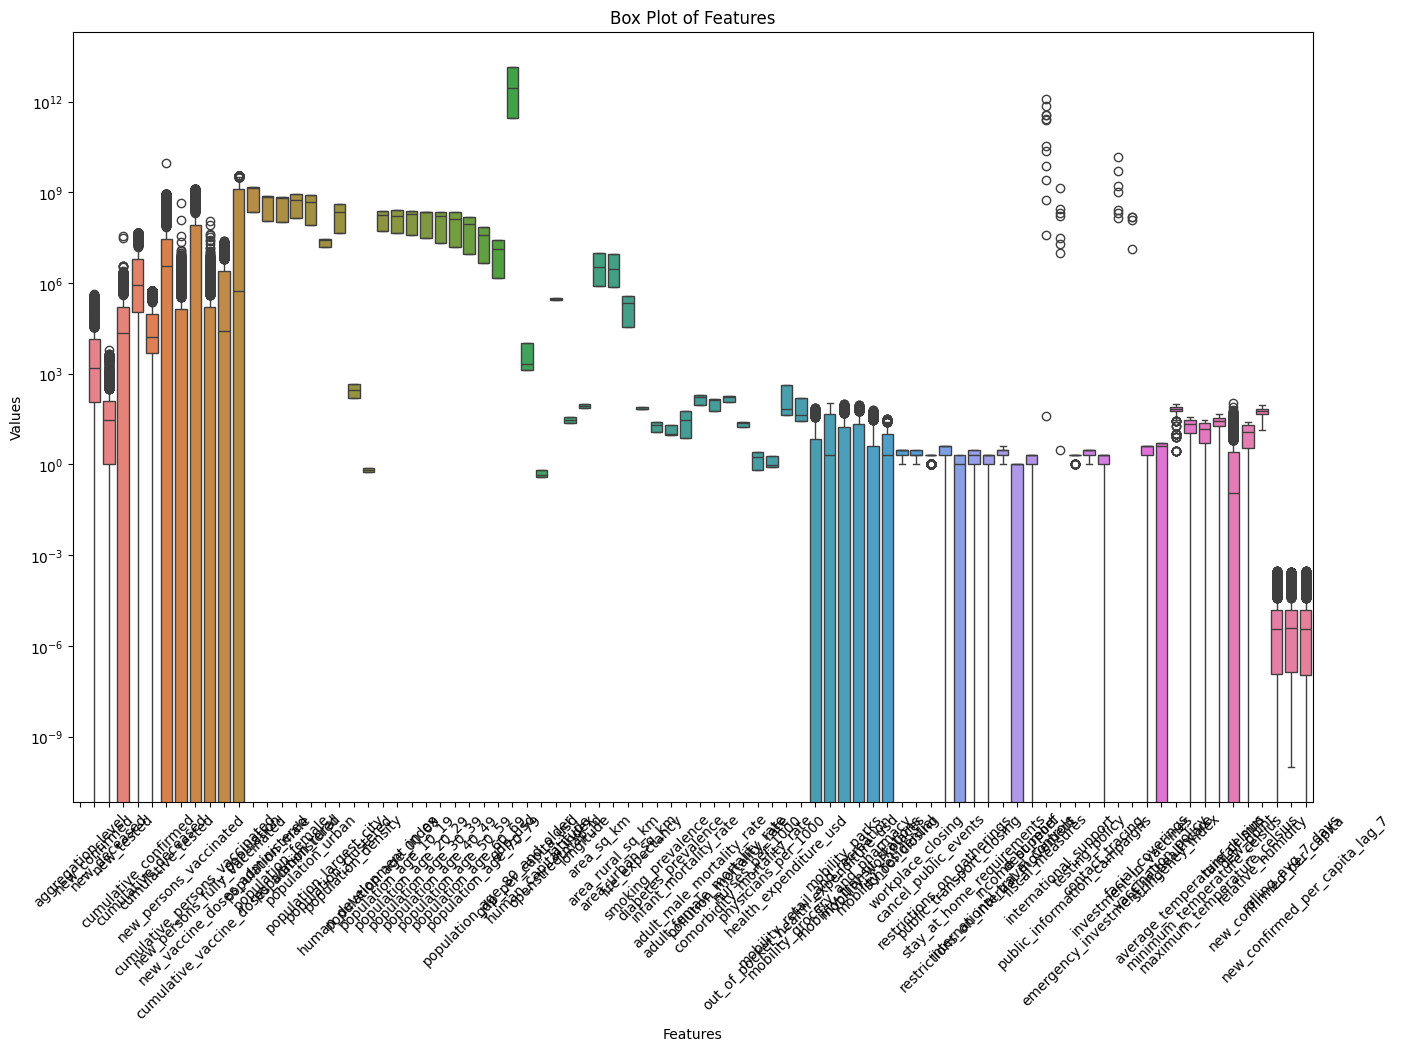

In [79]:
plt.figure(figsize=(16, 10))
sns.boxplot(df_nonzero)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Features')
plt.show()

In [139]:
from sklearn.model_selection import TimeSeriesSplit


split_idx = int(len(df_nonzero) * 0.8)
train = df_nonzero.iloc[:split_idx]
test  = df_nonzero.iloc[split_idx:]

In [135]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

features = ['rolling_avg_7_days', 'new_confirmed_per_capita_lag_7', 'mobility_retail_and_recreation',
            'mobility_transit_stations', 'mobility_workplaces', 'stringency_index',
            'latitude', 'longitude']

X_train = train[features]
y_train = train['new_confirmed_per_capita']

X_test = test[features]
y_test = test['new_confirmed_per_capita']

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

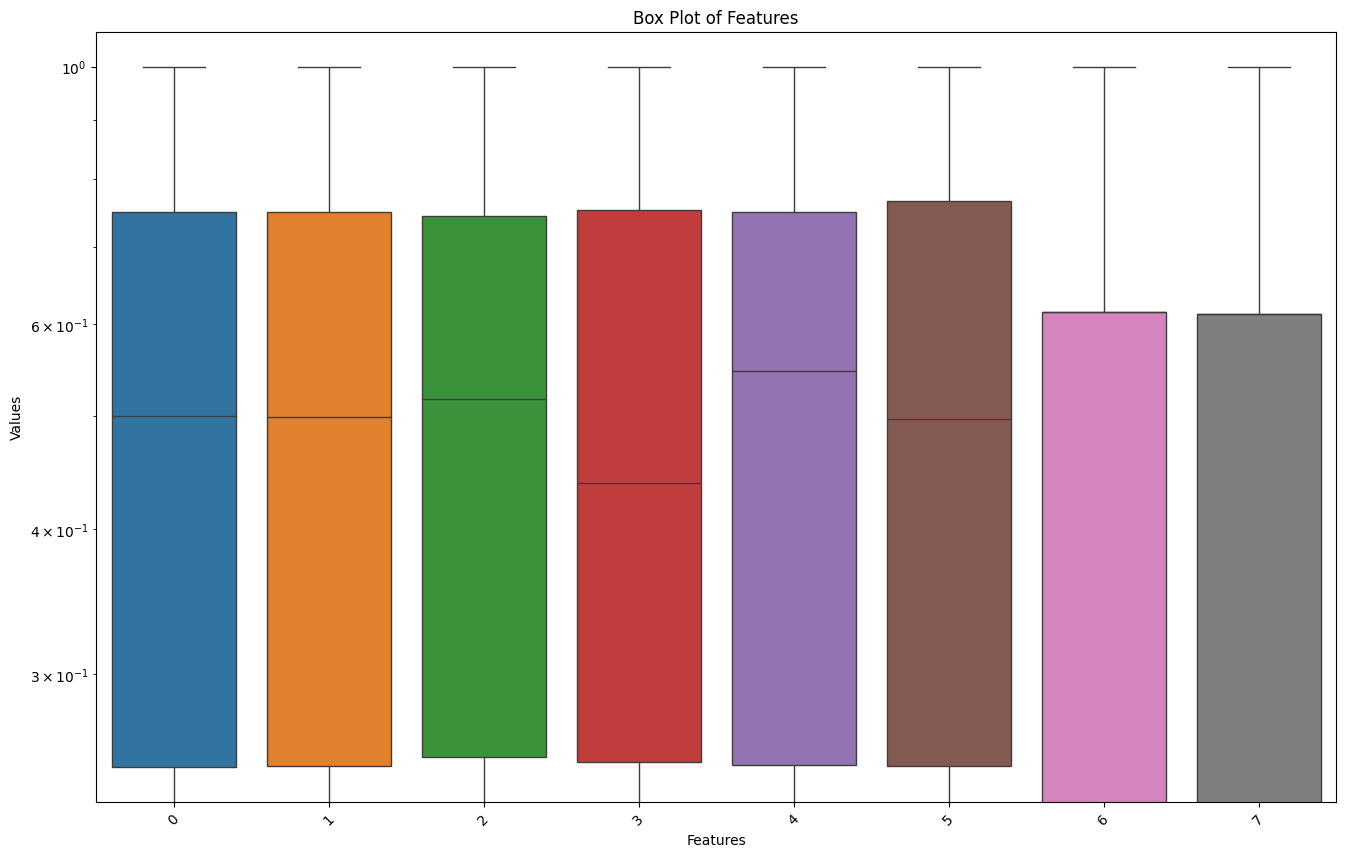

In [136]:
plt.figure(figsize=(16, 10))
sns.boxplot(X_train_scaled)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Features')
plt.show()

In [137]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

HistGradientBoostingRegressor()

In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"RMSE: {rmse:.6f}, MAE: {mae:.6f}, R²: {r2:.4f}, MSE: {mse: .10f}")

RMSE: 0.000015, MAE: 0.000004, R²: 0.5679, MSE:  0.0000000002


- **R² = 0.5679** means model explains about 57% of the variance in the test data — decent for noisy epidemiological data, but not stellar.

### Reverse scaling the variables (Remember - We did feature engineering)

In [104]:

test_index = X_test.index
dates_test = df.loc[test_index, 'date']

df_results = pd.DataFrame({
    'date': dates_test,
    'actual': y_test,
    'predicted': y_pred,
    'population': df.loc[test_index, 'population']
})
results_df = df_results.merge(df[['date', 'population']], on='date', how='left')


In [105]:
results_df.columns

Index(['date', 'actual', 'predicted', 'population_x', 'population_y'], dtype='object')

In [106]:
results_df['actual_absolute'] = results_df['actual'] * results_df['population_x']
results_df['predicted_absolute'] = results_df['predicted'] * results_df['population_y']


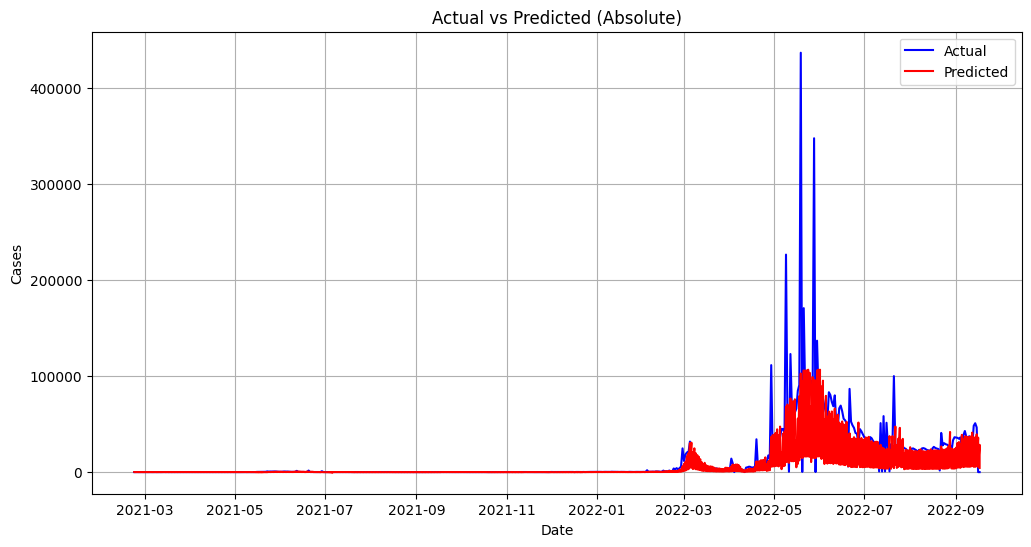

In [112]:
plt.figure(figsize=(12,6))
plt.plot(results_df['date'], results_df['actual_absolute'], label='Actual', color='blue')
plt.plot(results_df['date'], results_df['predicted_absolute'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Actual vs Predicted (Absolute)')
plt.legend()
# plt.yscale('log')
plt.grid(True)
plt.show()


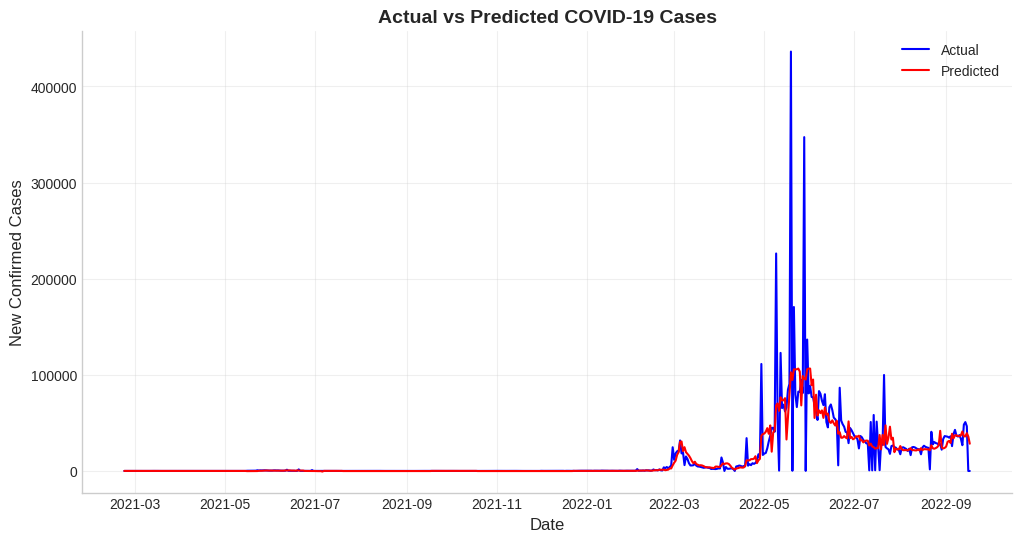

In [173]:
# y_test and y_pred are per capita, multiply by population (Go back and See Feature Engineering Step)

# Align population values with y_test index
population_test = df.loc[y_test.index, 'population'].values

y_test_raw = y_test * population_test
y_pred_raw = y_pred * population_test

plt.figure(figsize=(12,6))
plt.plot(df.loc[y_test.index, 'date'], y_test_raw, label='Actual', color='blue')
plt.plot(df.loc[y_test.index, 'date'], y_pred_raw, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.title('Actual vs Predicted COVID-19 Cases')
plt.legend()
plt.grid(True)
sns.despine()
# plt.yscale("log")
# plt.savefig('./images/Actual vs Predicted COVID-19 Cases.png', dpi=300, bbox_inches='tight')
plt.show()
